## Advance Machine Learning Assignment (Telecom Churn Case Study)

### Business Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Business Goal
For many incumbent operators, __retaining high profitable customers is the number one business goal__. To reduce customer churn, telecom companies need to __predict which customers are at high risk of churn__.

__Usage based churn__ Customers who have not done any usage, either incoming or outgoing in terms of calls, internet etc. over a period of time. In this assignement we will use the usage based definition to define customer churn.

### Importing the Dataset and required libraries

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from collections import Counter

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\MSDSC\Advance-ML-Case-Study\\telecom_churn_data.csv")

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.shape

(99999, 226)

### Data Preparation

In [5]:
# Checking for duplicate rows in the dataset
data[data.duplicated() == True]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


##### Dropping Identifier column

In [6]:
data.drop(columns=['mobile_number'], axis=1, inplace=True)

In [7]:
category_columns=data.loc[:, data.dtypes == 'object'].columns
category_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [8]:
numerical_columns=data.select_dtypes(include = ['int64','float64']).columns.tolist()
numerical_columns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou

#### Handling missing Values

In [9]:
## missing values for Usage-based churn recharge data and recharge amount 
rech_cols= data.columns[data.columns.str.contains('rech_amt|rech_data')]
print (rech_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [10]:
data[rech_cols]

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,...,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,...,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,74,384,283,121,44,154,65,50,NaN,7/25/2014,...,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN
2,168,315,116,358,86,200,86,100,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,230,310,601,410,60,50,50,50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,196,350,287,200,56,110,110,50,06-04-2014,NaN,...,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,60,110,0,50,60,110,0,50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,110,110,182,30,110,110,149,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,119,0,0,0,50,0,0,0,6/13/2014,NaN,...,NaN,NaN,25.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN
99997,381,358,716,862,202,179,179,252,6/17/2014,7/19/2014,...,4.0,4.0,202.0,179.0,179.0,252.0,583.0,358.0,716.0,862.0


In [11]:
# Chekcing the percentage of missing values of recharge columns
((data[rech_cols].isnull().sum()/data.shape[0]) * 100).sort_values(ascending=False)

total_rech_data_6           74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
date_of_last_rech_data_6    74.846748
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_9    74.077741
max_rech_data_9             74.077741
total_rech_data_9           74.077741
av_rech_amt_data_9          74.077741
date_of_last_rech_data_8    73.660737
total_rech_data_8           73.660737
max_rech_data_8             73.660737
av_rech_amt_data_8          73.660737
total_rech_amt_7             0.000000
max_rech_amt_9               0.000000
max_rech_amt_8               0.000000
max_rech_amt_7               0.000000
max_rech_amt_6               0.000000
total_rech_amt_9             0.000000
total_rech_amt_8             0.000000
total_rech_amt_6             0.000000
dtype: float64

Impute the missing values for recharge and amount related columns with zero value as that means no usage

In [12]:
data[rech_cols]=data[rech_cols].fillna(0)

In [13]:
# Chekcing the percentage of missing values of recharge columns
((data[rech_cols].isnull().sum()/data.shape[0]) * 100).sort_values(ascending=False)

total_rech_amt_6            0.0
total_rech_amt_7            0.0
av_rech_amt_data_8          0.0
av_rech_amt_data_7          0.0
av_rech_amt_data_6          0.0
max_rech_data_9             0.0
max_rech_data_8             0.0
max_rech_data_7             0.0
max_rech_data_6             0.0
total_rech_data_9           0.0
total_rech_data_8           0.0
total_rech_data_7           0.0
total_rech_data_6           0.0
date_of_last_rech_data_9    0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_6    0.0
max_rech_amt_9              0.0
max_rech_amt_8              0.0
max_rech_amt_7              0.0
max_rech_amt_6              0.0
total_rech_amt_9            0.0
total_rech_amt_8            0.0
av_rech_amt_data_9          0.0
dtype: float64

Now let's check the missing values for other columns

In [14]:
missing_val=((data.isnull().sum()/data.shape[0]) * 100).sort_values(ascending=False)
missing_val

night_pck_user_6      74.846748
count_rech_3g_6       74.846748
arpu_2g_6             74.846748
arpu_3g_6             74.846748
count_rech_2g_6       74.846748
                        ...    
last_day_rch_amt_7     0.000000
last_day_rch_amt_6     0.000000
max_rech_amt_9         0.000000
max_rech_amt_8         0.000000
sep_vbc_3g             0.000000
Length: 225, dtype: float64

Checking number of columns having 70 percent or more missing values

In [15]:
len(missing_val[missing_val >= 70])

24

In [16]:
missing_val_df=pd.DataFrame(missing_val)
missing_val_df=missing_val_df.reset_index()
missing_val_df.columns=['column', 'missing_val_per']
drop_columns=missing_val_df[missing_val_df.missing_val_per >= 70]['column']
drop_columns

0     night_pck_user_6
1      count_rech_3g_6
2            arpu_2g_6
3            arpu_3g_6
4      count_rech_2g_6
5            fb_user_6
6      count_rech_2g_7
7      count_rech_3g_7
8            fb_user_7
9            arpu_3g_7
10           arpu_2g_7
11    night_pck_user_7
12     count_rech_2g_9
13    night_pck_user_9
14           fb_user_9
15           arpu_2g_9
16     count_rech_3g_9
17           arpu_3g_9
18           fb_user_8
19    night_pck_user_8
20           arpu_3g_8
21     count_rech_2g_8
22     count_rech_3g_8
23           arpu_2g_8
Name: column, dtype: object

Remove columns with missing values greater than 70 percent

In [17]:
data.drop(columns=drop_columns, axis=1, inplace=True)

In [18]:
data.shape

(99999, 201)

Imputing missing values of Last date of month with same date as most occuring date taking mode

In [19]:
data.last_date_of_month_6=data.last_date_of_month_6.fillna(data.last_date_of_month_6.mode)
data.last_date_of_month_7=data.last_date_of_month_7.fillna(data.last_date_of_month_7.mode)
data.last_date_of_month_8=data.last_date_of_month_8.fillna(data.last_date_of_month_8.mode)
data.last_date_of_month_9=data.last_date_of_month_9.fillna(data.last_date_of_month_9.mode)

In [20]:
missing_vals=((data.isnull().sum()/data.shape[0]) * 100).sort_values(ascending=False)
missing_vals=missing_vals[missing_vals > 0]
missing_vals

std_og_t2f_mou_9       7.745077
isd_og_mou_9           7.745077
std_ic_mou_9           7.745077
roam_ic_mou_9          7.745077
spl_og_mou_9           7.745077
                         ...   
date_of_last_rech_7    1.767018
date_of_last_rech_6    1.607016
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
loc_og_t2o_mou         1.018010
Length: 123, dtype: float64

In [21]:
data.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,...,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,...,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842,267.580450,271.201856,253.938223,32.408353
min,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


Imputing all missing values to 0 as most of the columns are numerical related to amount, call durations and data usage and blank values does make sense as no usage.

In [22]:
data.fillna(0, inplace=True)

In [23]:
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 201, dtype: int64

#### Deriving New Features

Add features for the average recharge amount in the first two months (the good phase) june(6) and july(7).
Average the revenue generated by the customer in first two months.

In [24]:
data['total_amt_rech_avg_gp'] = (data.total_rech_amt_6 + data.total_rech_amt_7 + data.av_rech_amt_data_6 + data.av_rech_amt_data_7) / 2

In [25]:
data.total_amt_rech_avg_gp.describe()

count    99999.000000
mean       375.158217
std        422.446506
min          0.000000
25%        125.000000
50%        263.500000
75%        492.000000
max      37762.500000
Name: total_amt_rech_avg_gp, dtype: float64

#### Filtering High Value Customers
Those who have recharged with an amount more than or equal to the 70th percentile of the average recharge amount (voice calls and intenet data) in the first two months (the good phase)

In [26]:
data.total_amt_rech_avg_gp.quantile(0.7)

431.0

In [27]:
data=data[data.total_amt_rech_avg_gp >= data.total_amt_rech_avg_gp.quantile(0.7)]
data=data.reset_index(drop=True)
data

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_avg_gp
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,0,0,0,968,30.40,0.00,101.20,3.58,559.0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,...,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,...,0,0,0,0,315,21.03,910.65,122.16,0.00,607.5
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,...,0,0,0,0,511,0.00,2.45,21.89,0.00,459.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,...,0,0,0,0,720,0.00,0.00,0.00,0.00,640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30010,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,328.594,202.966,...,0,0,0,1,820,0.00,0.00,0.00,0.00,437.0
30011,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,644.973,455.228,...,0,0,0,0,2696,497.45,598.67,604.08,0.00,864.0
30012,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,312.558,512.932,...,0,0,0,0,328,104.73,0.00,0.00,0.00,544.0
30013,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,...,1,0,0,0,478,1445.74,1151.03,1173.18,0.00,840.0


After filtering the High value customers from the dataset we see that we have approximately 30k rows/customers whose churn prediction is more important from business perspective.

#### Defining the Churn column

Defining the Usage-based churn, customers who have not done any usage, either incoming or outgoing in terms of calls, internet etc. over a period of time. Tagging the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
The attributes used to tag churners are :
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [28]:
data['usage_9']=data.total_ic_mou_9 + data.total_og_mou_9 + data.vol_2g_mb_9 + data.vol_3g_mb_9

In [29]:
data['churn']=data.usage_9.apply(lambda x: 0 if x > 0 else 1)

In [30]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_avg_gp,usage_9,churn
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,0,968,30.40,0.00,101.20,3.58,559.0,0.00,1
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,...,0,0,802,57.74,19.38,18.74,0.00,1185.0,0.00,1
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,...,0,0,315,21.03,910.65,122.16,0.00,607.5,177.09,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,...,0,0,511,0.00,2.45,21.89,0.00,459.0,590.30,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,...,0,0,720,0.00,0.00,0.00,0.00,640.0,1284.14,0


Removing all the attributes corresponding to the churn phase (all attributes having ‘_9’, etc. in their names)


In [31]:
data.columns[data.columns.str.contains('_9')]

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'usage_9'],
      dtype=

In [32]:
data.drop(columns=data.columns[data.columns.str.contains('_9')], axis=1, inplace=True)

In [33]:
data.shape

(30015, 155)

In [34]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_avg_gp,churn
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,...,0,0,0,968,30.40,0.00,101.20,3.58,559.0,1
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,...,0,0,0,802,57.74,19.38,18.74,0.00,1185.0,1
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,...,0,0,0,315,21.03,910.65,122.16,0.00,607.5,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,...,0,0,0,511,0.00,2.45,21.89,0.00,459.0,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,...,0,0,0,720,0.00,0.00,0.00,0.00,640.0,0


#### Standardising Features

Age on Network (aon) number of days the customer is using the operator's network

In [35]:
data.aon.describe()

count    30015.000000
mean      1243.773413
std        970.776817
min        180.000000
25%        469.000000
50%        883.000000
75%       1862.500000
max       4321.000000
Name: aon, dtype: float64

In [36]:
# Convert the age on network (days) in months 
data.aon=data.aon/30

In [37]:
data.aon.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    30015.000000
mean        41.459114
std         32.359227
min          6.000000
25%         15.633333
50%         29.433333
75%         62.083333
90%         94.433333
95%        105.466667
99%        121.700000
max        144.033333
Name: aon, dtype: float64

Drop the columns which have same date value e.g., last_date_of_month_6, last_date_of_month_7, last_date_of_month_8

In [38]:
data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [39]:
data.shape

(30015, 152)

Drop the columns with all zeros or 1 unique values as these doesn't present any useful information

In [40]:
data_col_cardinalities=pd.DataFrame(data.nunique())
data_col_cardinalities=data_col_cardinalities.reset_index()
data_col_cardinalities.columns=['col_name', 'unique_val']
columns_all_zeros=data_col_cardinalities[data_col_cardinalities['unique_val'] == 1]
columns_all_zeros

,col_name,unique_val
0,circle_id,1
1,loc_og_t2o_mou,1
2,std_og_t2o_mou,1
3,loc_ic_t2o_mou,1
43,std_og_t2c_mou_6,1
44,std_og_t2c_mou_7,1
45,std_og_t2c_mou_8,1
82,std_ic_t2o_mou_6,1
83,std_ic_t2o_mou_7,1
84,std_ic_t2o_mou_8,1


In [41]:
data.drop(columns=columns_all_zeros['col_name'], axis=1, inplace=True)

In [42]:
data.shape

(30015, 142)

Derive new columns from the date_of_last_rech date columns to present the information whether customer has done recharge or not.
Having the date means recharge was done so we will assign value to 1 and if field is blank or 0 then no recharge was done so will assign value to 0.

In [43]:
data['rech_6']=data.date_of_last_rech_6.apply(lambda x: 1 if x !=0 else 0).apply(int)
data['rech_7']=data.date_of_last_rech_7.apply(lambda x: 1 if x !=0 else 0).apply(int)
data['rech_8']=data.date_of_last_rech_8.apply(lambda x: 1 if x !=0 else 0).apply(int)

In [44]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_avg_gp,churn,rech_6,rech_7,rech_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,32.266667,30.40,0.00,101.20,3.58,559.0,1,1,1,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,26.733333,57.74,19.38,18.74,0.00,1185.0,1,1,1,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,10.500000,21.03,910.65,122.16,0.00,607.5,0,1,1,1
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,17.033333,0.00,2.45,21.89,0.00,459.0,0,1,1,1
4,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,24.000000,0.00,0.00,0.00,0.00,640.0,0,1,1,1


Drop the date columns of last recharge as we already derived information from these.
Also drop the total_rech_amt_6, total_rech_amt_7, arpu_6, and apru_7 as the avegrage columns are already created. 

In [45]:
drop_columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
              'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
              'total_rech_amt_6', 'total_rech_amt_7']

data.drop(columns=drop_columns, axis=1, inplace=True)

In [46]:
data.shape

(30015, 137)

Take average of all the columns of good phase months and create corresponding columns with suffix "_avg_gp" which will be used to identify all good phase columns

In [47]:
cols_6_and_7=data.columns[data.columns.str.contains('_6|_7')]
cols_6_and_7

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
      

In [48]:
len(cols_6_and_7)

86

In [49]:
cols_6_and_7_identifiers=cols_6_and_7[cols_6_and_7.str.contains('_6')].str.replace('_6', '')
cols_6_and_7_identifiers

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data',
       'max_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'rech'],
      dtype='object')

In [50]:
len(cols_6_and_7_identifiers)

43

In [51]:
for col in cols_6_and_7_identifiers:
    avg_col = col + '_avg_gp'
    col_6 = col + '_6'
    col_7 = col + '_7'
    data[avg_col] = (data[col_6] + data[col_7]) / 2

In [52]:
data.shape

(30015, 180)

As recharge_avg_gp column is created to know whether there was any reacharge so converting to 0 and 1

In [53]:
data.rech_avg_gp=data.rech_avg_gp.apply(lambda x: 1 if x > 0 else 0)

Drop all the individual "_6" and "_7" month columns as we have taken the average for all columns in respective _avg_gp columns

In [54]:
data.drop(columns=cols_6_and_7, axis=1, inplace=True)

In [55]:
data.shape

(30015, 94)

#### Checking for Outliers in the dataset

In [56]:
cols = data.columns[data.columns.str.contains('amt|rech|arpu')]
cols

Index(['arpu_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'total_amt_rech_avg_gp', 'rech_8', 'arpu_avg_gp',
       'total_rech_num_avg_gp', 'max_rech_amt_avg_gp',
       'last_day_rch_amt_avg_gp', 'total_rech_data_avg_gp',
       'max_rech_data_avg_gp', 'av_rech_amt_data_avg_gp', 'rech_avg_gp'],
      dtype='object')

In [57]:
num_data = data[cols]

In [58]:
#Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .96, .97, .98, .99])

,arpu_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,total_amt_rech_avg_gp,rech_8,arpu_avg_gp,total_rech_num_avg_gp,max_rech_amt_avg_gp,last_day_rch_amt_avg_gp,total_rech_data_avg_gp,max_rech_data_avg_gp,av_rech_amt_data_avg_gp,rech_avg_gp
count,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.00000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.0
mean,524.580928,9.924171,602.463868,165.858837,96.370681,1.322072,70.650941,114.348783,807.663668,0.980710,577.392527,11.75349,177.151274,104.922655,1.372614,77.139230,125.307613,1.0
std,496.017589,9.363817,605.594178,172.414915,145.760536,2.707563,111.484696,195.921729,544.087239,0.137546,416.745402,8.73658,151.967739,115.328855,2.487174,104.802807,184.688750,0.0
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,-749.783000,0.50000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,266.123500,4.000000,284.000000,67.000000,0.000000,0.000000,0.000000,0.000000,523.500000,1.000000,377.578250,6.00000,110.000000,38.000000,0.000000,0.000000,0.000000,1.0
50%,442.864000,7.000000,505.000000,140.000000,50.000000,0.000000,0.000000,0.000000,658.500000,1.000000,485.350500,9.00000,130.000000,80.000000,0.500000,23.000000,57.500000,1.0
75%,666.147500,13.000000,784.000000,198.000000,130.000000,1.000000,154.000000,179.000000,915.000000,1.000000,674.446000,14.50000,202.000000,125.000000,1.500000,152.000000,203.000000,1.0
90%,981.743200,21.000000,1151.000000,252.000000,248.000000,4.000000,252.000000,304.000000,1286.000000,1.000000,949.498200,22.00000,300.000000,201.000000,3.500000,211.500000,313.000000,1.0
95%,1256.873600,28.000000,1491.000000,455.000000,252.000000,6.000000,252.000000,488.000000,1630.000000,1.000000,1187.908200,28.00000,453.500000,264.500000,5.650000,252.000000,425.575000,1.0
96%,1355.096720,30.000000,1593.000000,500.000000,300.000000,7.000000,252.000000,504.000000,1750.220000,1.000000,1275.388280,30.50000,500.000000,300.000000,6.500000,252.000000,460.500000,1.0


There dosen't seem any outliers present in the dataset and some high values of minutes of usage are normal

#### Checking correlation between amount, recharge related columns

In [59]:
data[cols]

,arpu_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,total_amt_rech_avg_gp,rech_8,arpu_avg_gp,total_rech_num_avg_gp,max_rech_amt_avg_gp,last_day_rch_amt_avg_gp,total_rech_data_avg_gp,max_rech_data_avg_gp,av_rech_amt_data_avg_gp,rech_avg_gp
0,213.803,2,252,252,252,1.0,252.0,252.0,559.0,1,206.1005,3.5,252.0,252.0,1.0,252.0,252.0,1
1,3171.480,7,3638,1580,779,0.0,0.0,0.0,1185.0,1,1209.5150,5.0,1185.0,0.0,0.0,0.0,0.0,1
2,137.362,14,120,30,10,3.0,23.0,69.0,607.5,1,435.4720,20.0,122.0,25.0,1.0,77.0,88.5,1
3,187.894,2,160,130,130,0.0,0.0,0.0,459.0,1,365.4220,8.0,110.0,100.0,0.0,0.0,0.0,1
4,637.760,27,718,50,50,0.0,0.0,0.0,640.0,1,556.1030,24.0,50.0,25.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30010,118.707,9,137,30,25,5.0,25.0,117.0,437.0,1,265.7800,9.0,100.0,12.5,2.5,100.0,137.5,1
30011,564.334,3,25,25,0,1.0,25.0,25.0,864.0,1,550.1005,7.0,668.0,668.0,1.0,15.5,15.5,1
30012,402.080,9,504,154,50,1.0,154.0,154.0,544.0,1,412.7450,12.0,102.0,50.0,0.5,77.0,77.0,1
30013,606.817,4,716,179,179,4.0,179.0,716.0,840.0,1,313.1885,3.5,190.5,190.5,2.5,190.5,470.5,1


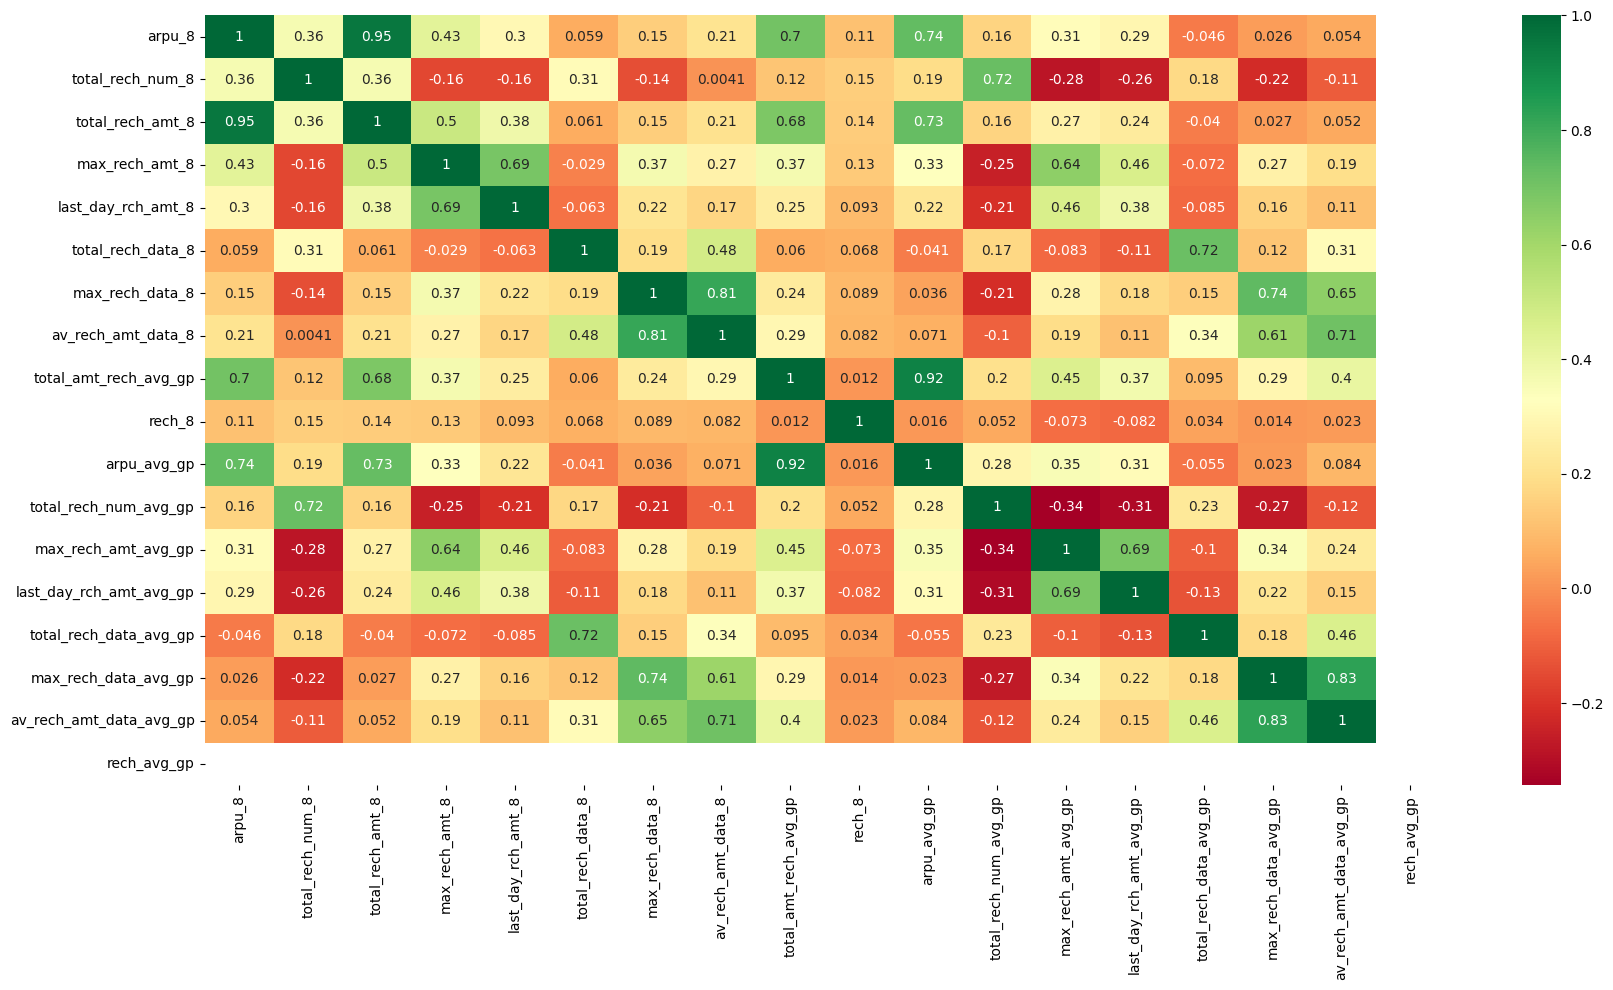

In [60]:
plt.figure(figsize = (20,10))
sns.heatmap(data[cols].corr(), annot = True, cmap='RdYlGn')
plt.show()

We see that there are several features which high correlations among each other so that will be taken care during the PCA.

### Exploratoray Data Analysis

##### Target Variable

In [61]:
data['churn'].value_counts(normalize=True)


0    0.918041
1    0.081959
Name: churn, dtype: float64

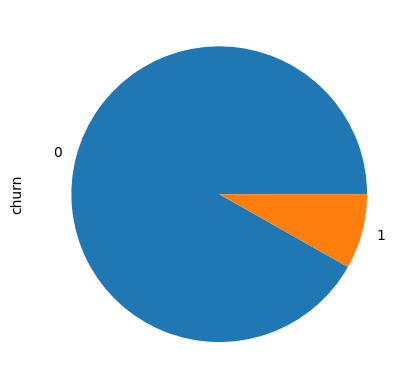

In [62]:
data['churn'].value_counts(normalize=True).plot.pie()
plt.show()

We see that the customer's churn ratio is very less approximately 8% and non churn is 92%.

##### Total Incoming and Outgoing Minutes of Usage (Voice Calls)

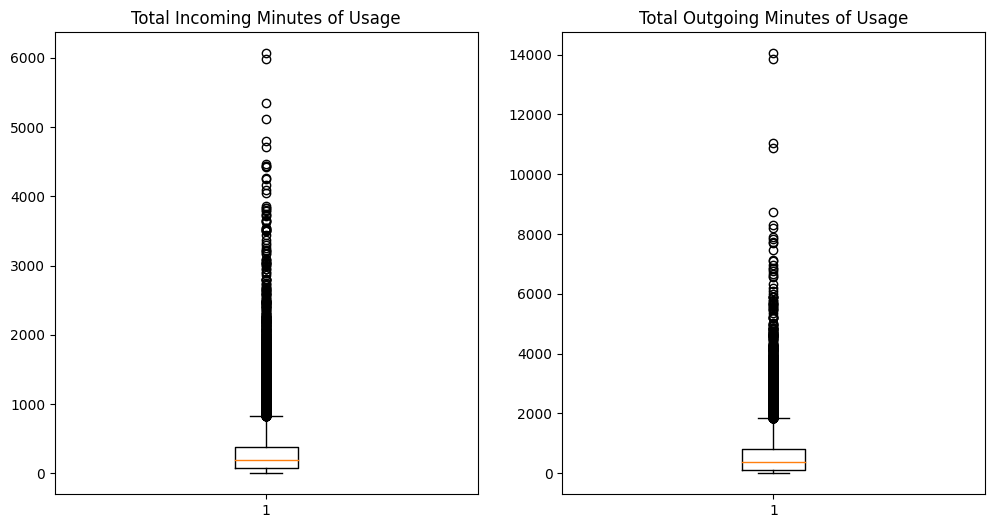

In [63]:
plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
plt.boxplot(data.total_ic_mou_8)
plt.title('Total Incoming Minutes of Usage')

plt.subplot(1,2,2)
plt.boxplot(data.total_og_mou_8)
plt.title('Total Outgoing Minutes of Usage')

plt.show()

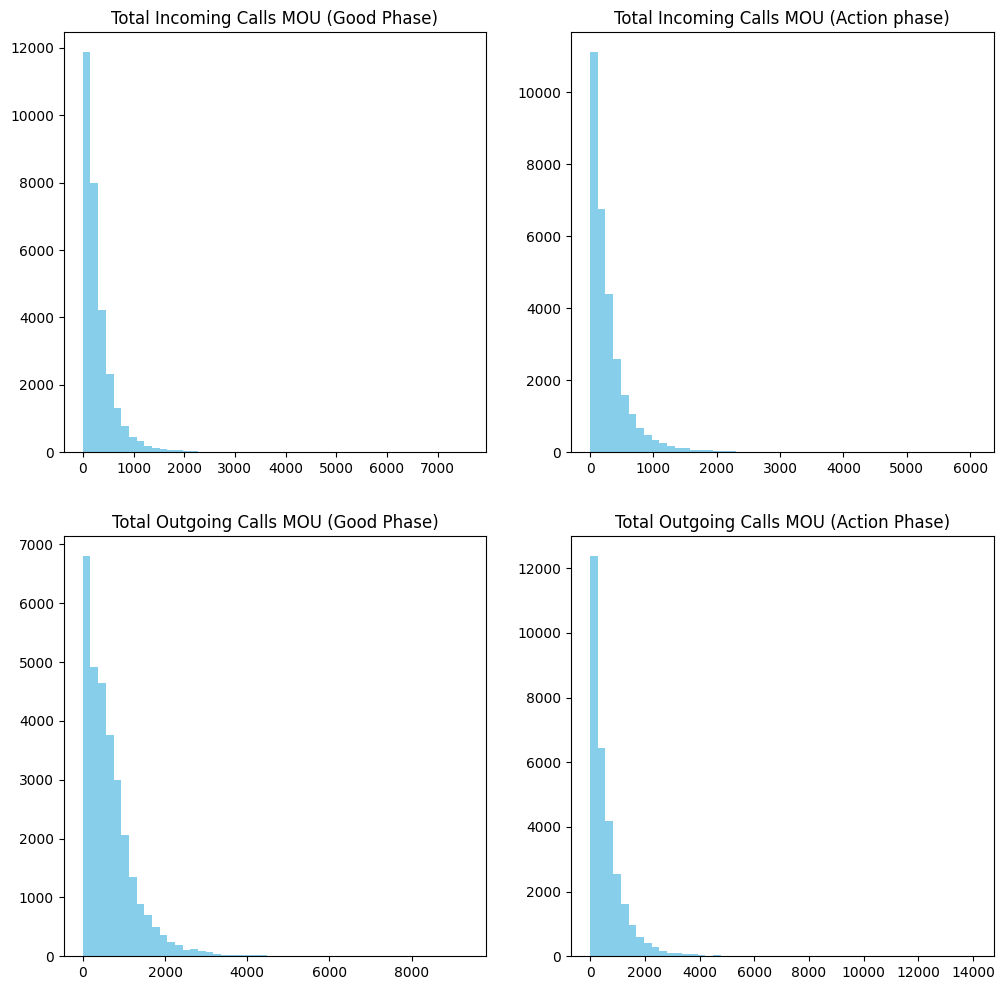

In [64]:
plt.figure(figsize = (12, 12))
plt.subplot(221)
plt.hist(data['total_ic_mou_avg_gp'], bins = 50, color = "skyblue")
plt.title('Total Incoming Calls MOU (Good Phase)')

plt.subplot(222)
plt.hist(data['total_ic_mou_8'], bins = 50, color = "skyblue")
plt.title('Total Incoming Calls MOU (Action phase)')

plt.subplot(223)
plt.hist(data['total_og_mou_avg_gp'], bins = 50, color = "skyblue")
plt.title('Total Outgoing Calls MOU (Good Phase)')

plt.subplot(224)
plt.hist(data['total_og_mou_8'], bins = 50, color = "skyblue")
plt.title('Total Outgoing Calls MOU (Action Phase)')

plt.show()


Majority of Incoming and outgoing voice calls are done during action phase are less as compared to the good phase i.e., first two months

##### Average Revenue Per User

Lets see how different features are related to Average Revenue Per User in action phase month

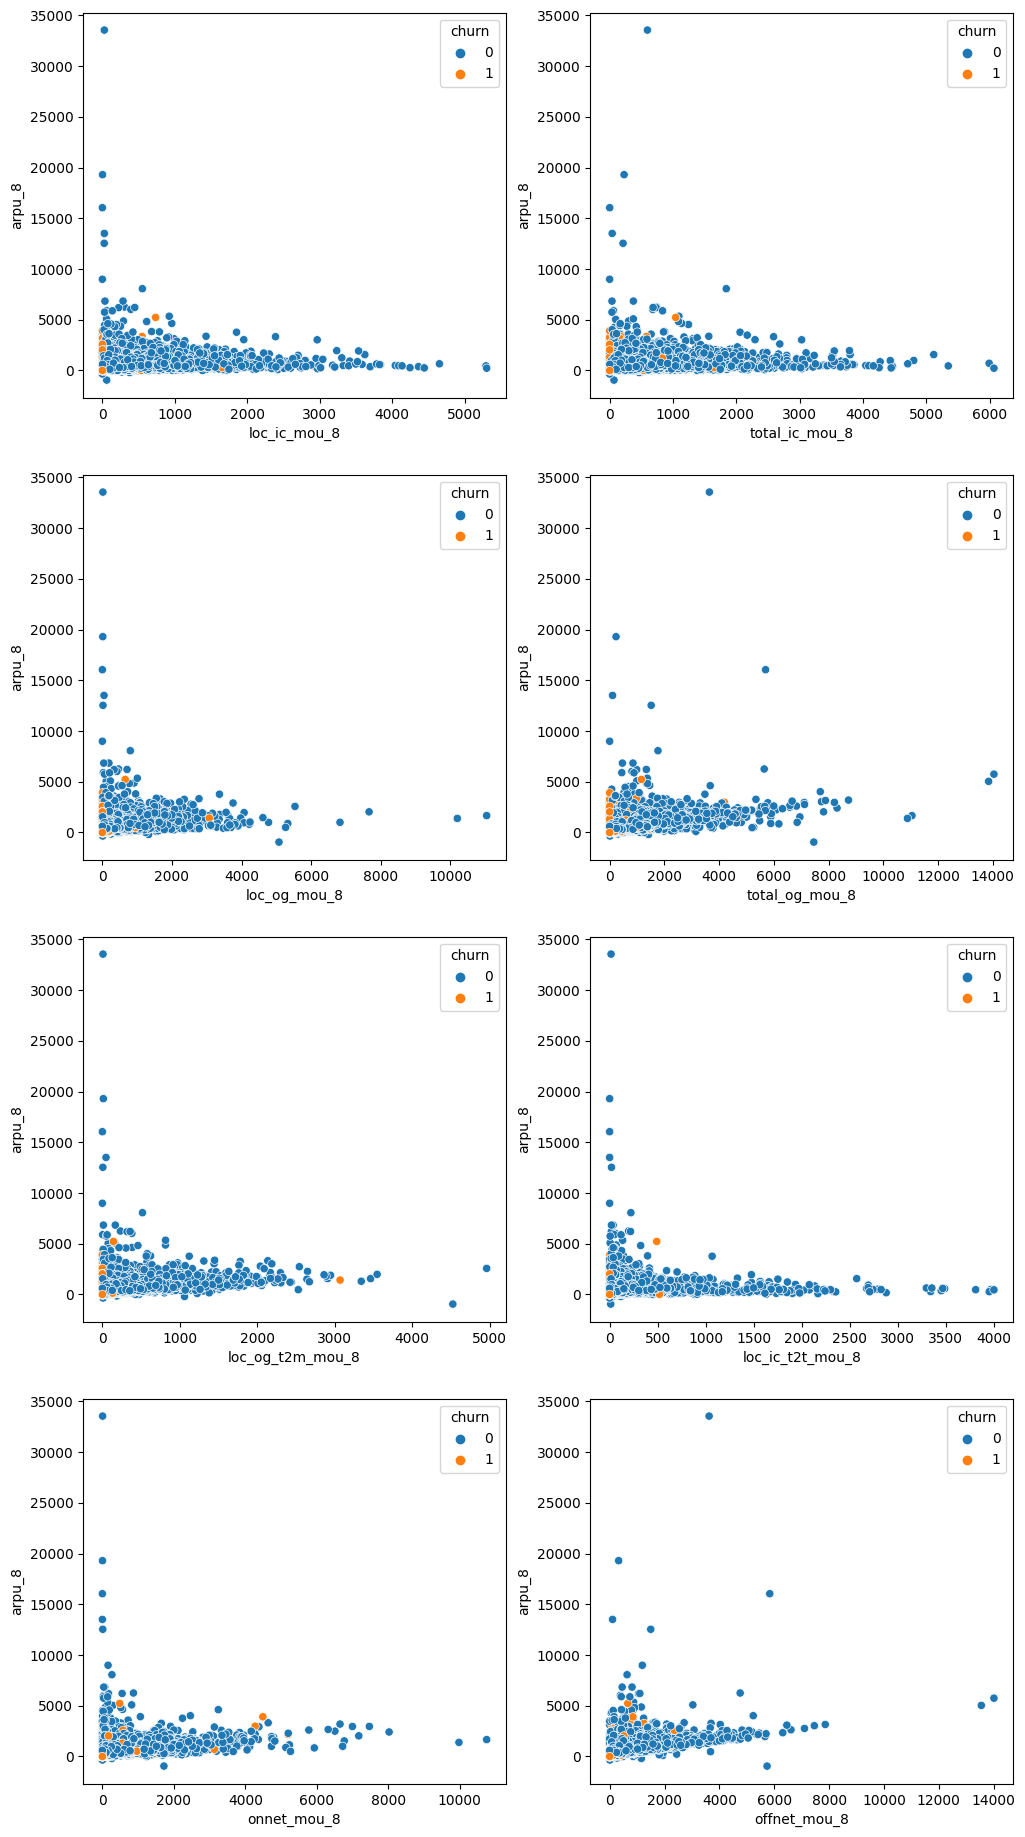

In [65]:
plt.figure(figsize = (12, 35))

plt.subplot(6,2,1)
sns.scatterplot(data=data, x='loc_ic_mou_8', y='arpu_8', hue='churn')

plt.subplot(6,2,2)
sns.scatterplot(data=data, x='total_ic_mou_8', y='arpu_8', hue='churn')

plt.subplot(6,2,3)
sns.scatterplot(data=data, x='loc_og_mou_8', y='arpu_8', hue='churn')

plt.subplot(6,2,4)
sns.scatterplot(data=data, x='total_og_mou_8', y='arpu_8', hue='churn')

plt.subplot(6,2,5)
sns.scatterplot(data=data, x='loc_og_t2m_mou_8', y='arpu_8', hue='churn')

plt.subplot(6,2,6)
sns.scatterplot(data=data, x='loc_ic_t2t_mou_8', y='arpu_8', hue='churn')

plt.subplot(6,2,7)
sns.scatterplot(data=data, x='onnet_mou_8', y='arpu_8', hue='churn')

plt.subplot(6,2,8)
sns.scatterplot(data=data, x='offnet_mou_8', y='arpu_8', hue='churn')

plt.show()

Incoming, Outgoing, Roaming, Max rech amount, Total within network and outside network Analysis

In [66]:
columns=['total_ic_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8',
         'loc_og_t2t_mou_8', 'max_rech_amt_8', 'total_rech_amt_8', 'arpu_8', 'loc_ic_t2m_mou_8',
         'loc_og_t2m_mou_8', 'roam_og_mou_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_ic_t2f_mou_8']

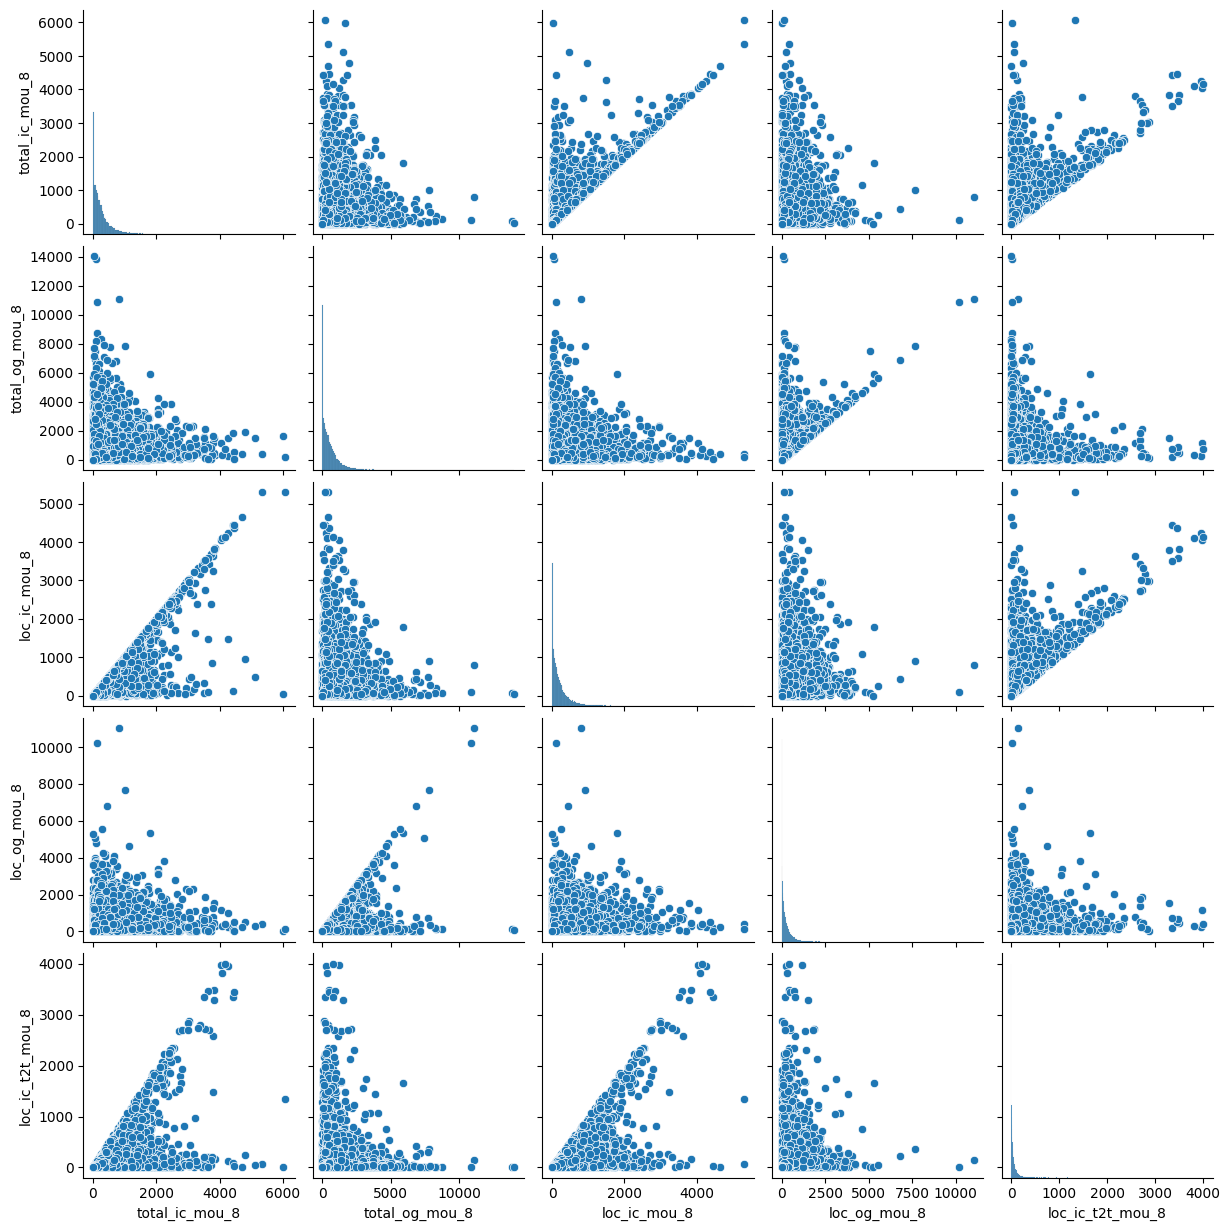

In [67]:
sns.pairplot(data=data, vars=columns[:5])
plt.show()

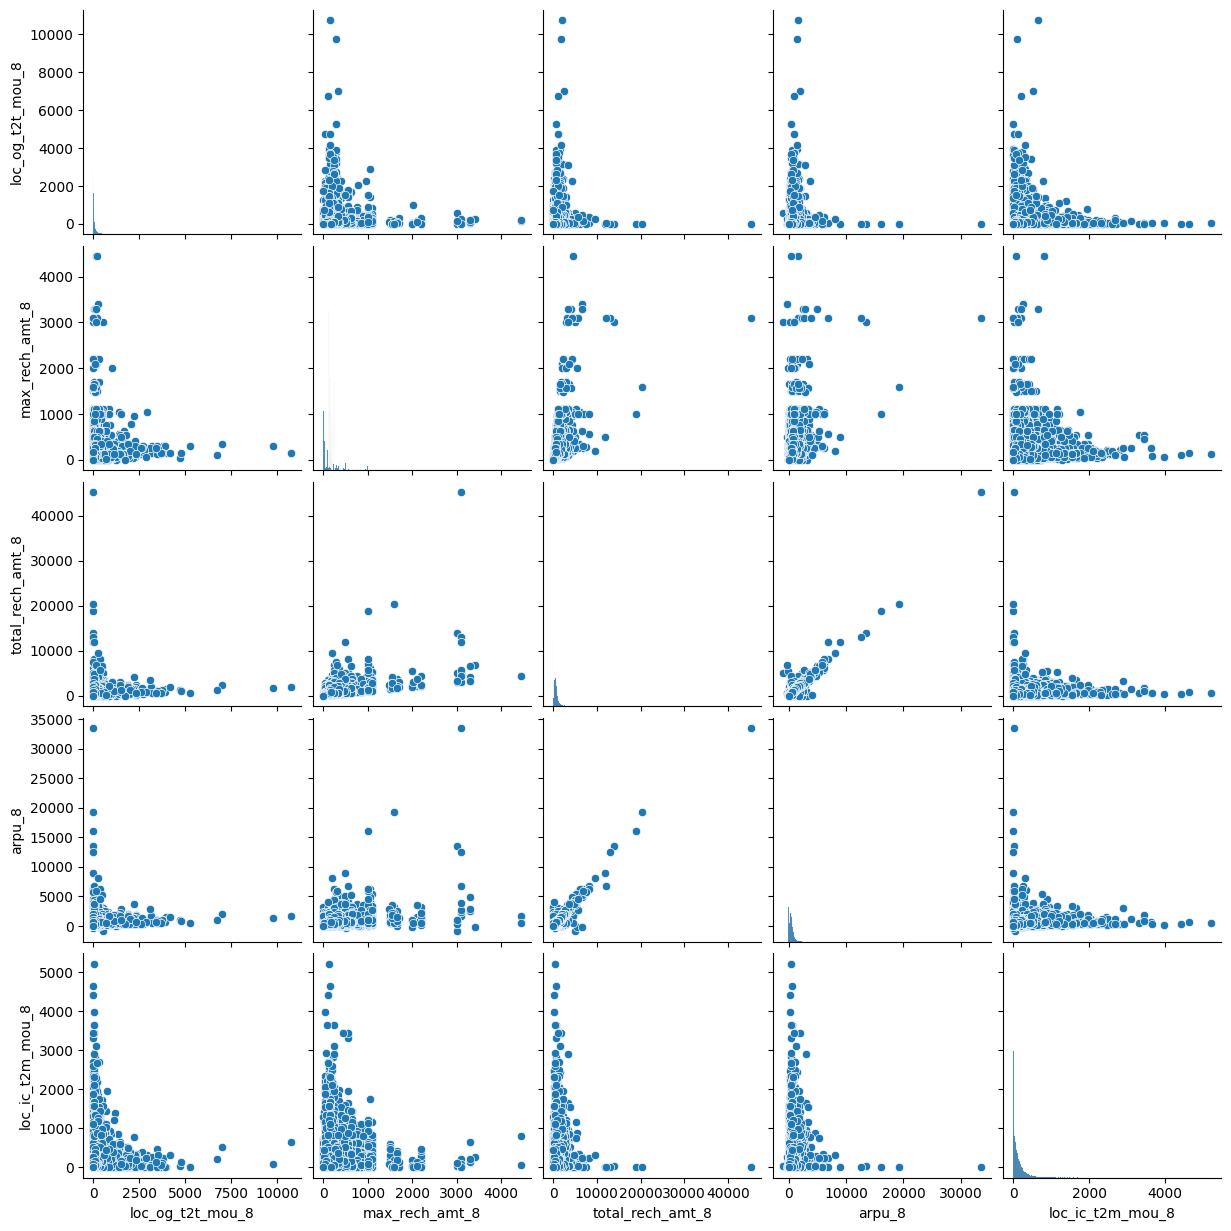

In [68]:
sns.pairplot(data=data, vars=columns[5:10])
plt.show()

arpu_8 and total_rech_amt_8 have very high correlation among each others

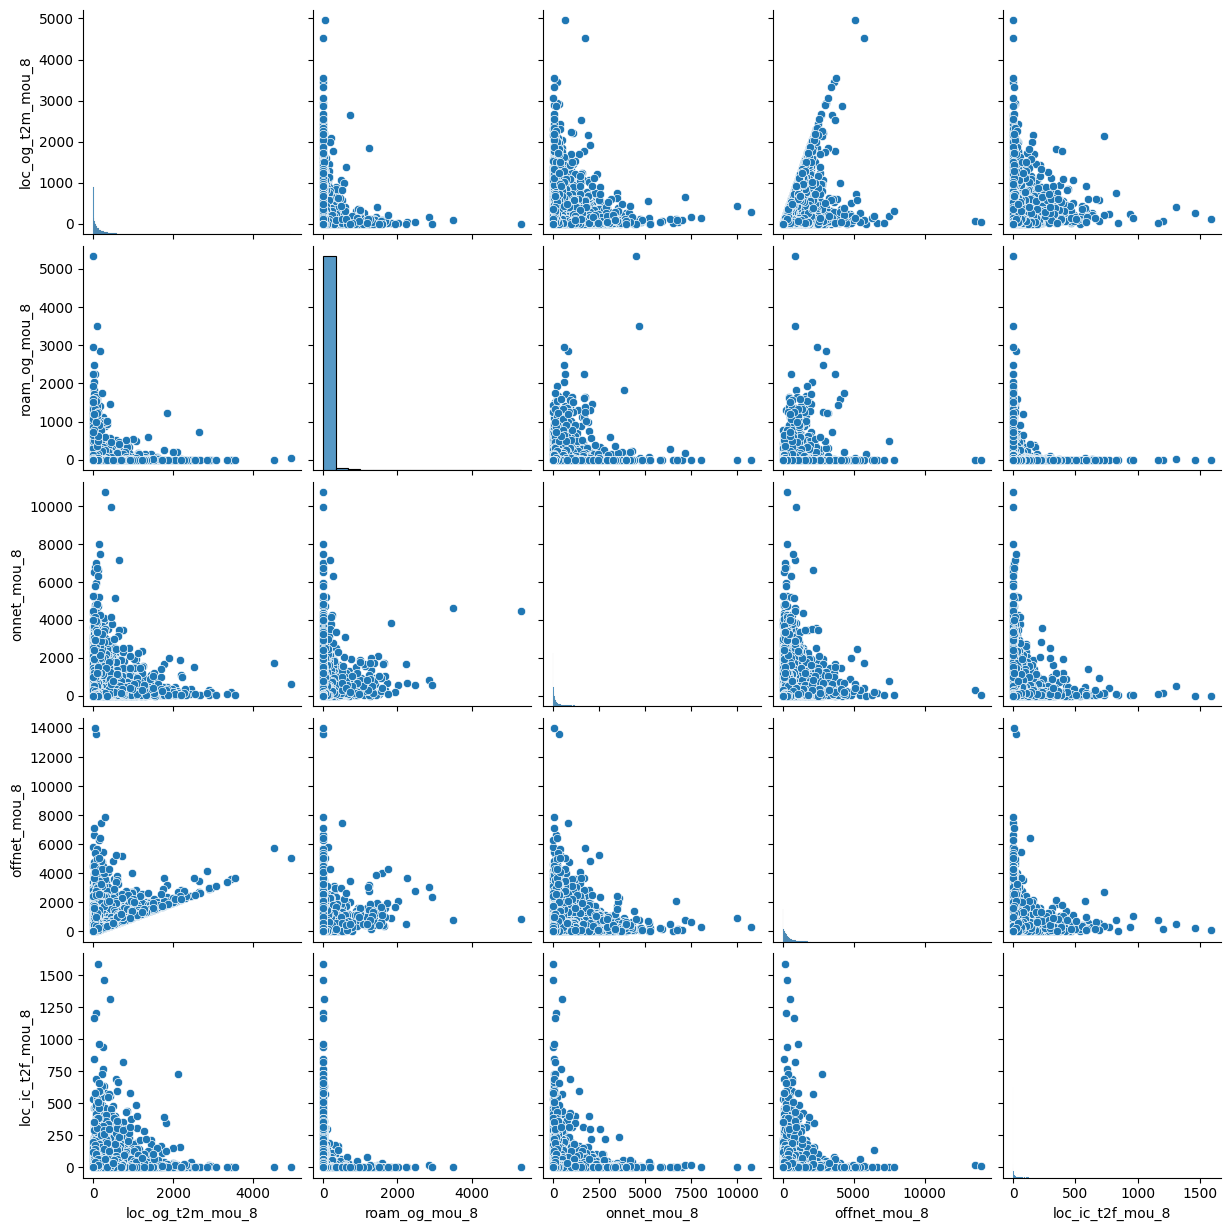

In [69]:
sns.pairplot(data=data, vars=columns[10:15])
plt.show()

##### Age on Network

In [70]:
data.aon.describe()

count    30015.000000
mean        41.459114
std         32.359227
min          6.000000
25%         15.633333
50%         29.433333
75%         62.083333
max        144.033333
Name: aon, dtype: float64

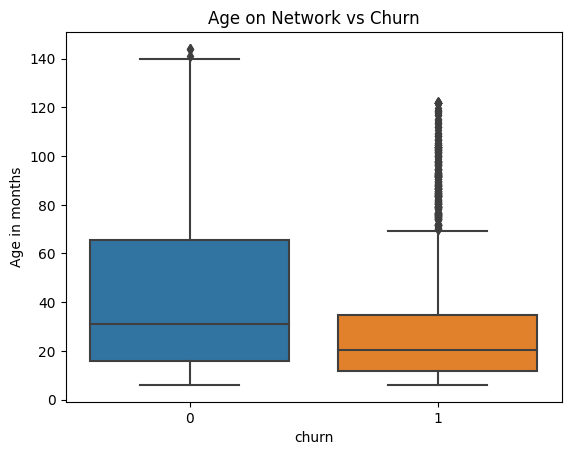

In [71]:
sns.boxplot(x = data.churn, y = data.aon)
plt.ylabel('Age in months')
plt.title('Age on Network vs Churn')
plt.show()

Customers with higher age on network have the less churn probability

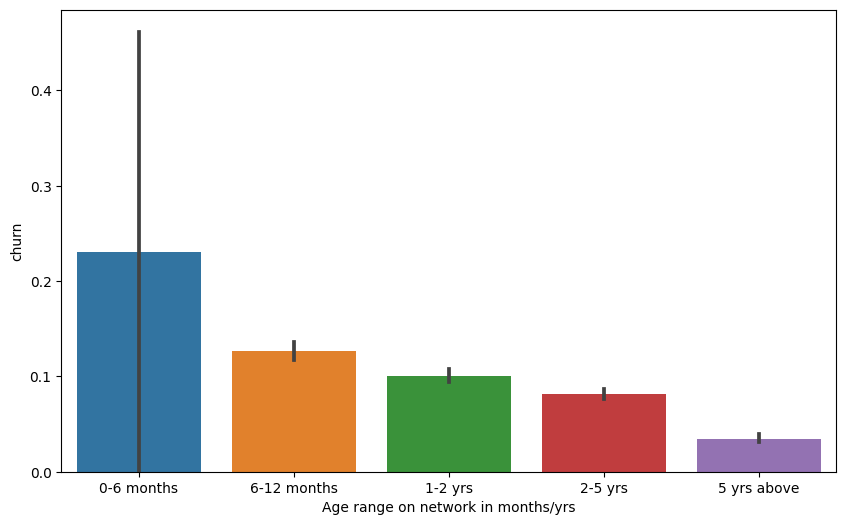

In [72]:
# Grouping the customers based on months in following categories
# 0-6 months, 6-12 months, 1-2 yrs, 2-5 yrs, and 5 yrs and above

## plotting bar graph for customers in network 
bin_range = [0, 6, 12, 24, 60, 160]
bin_label = [ '0-6 months', '6-12 months', '1-2 yrs', '2-5 yrs', '5 yrs above']
data['age_group_on_network'] = pd.cut(data['aon'], bin_range, labels=bin_label)
plt.figure(figsize=[10, 6])
sns.barplot(x='age_group_on_network', y='churn', data=data)
plt.xlabel("Age range on network in months/yrs")
plt.show()

From the above plot we can infer that the churn ratio is highest during initial 6 months and it slowly decreases over period of time. This can help business take decisions to provide promotional offers to reduce the customer's churn

##### Recharge done by customer in different phases

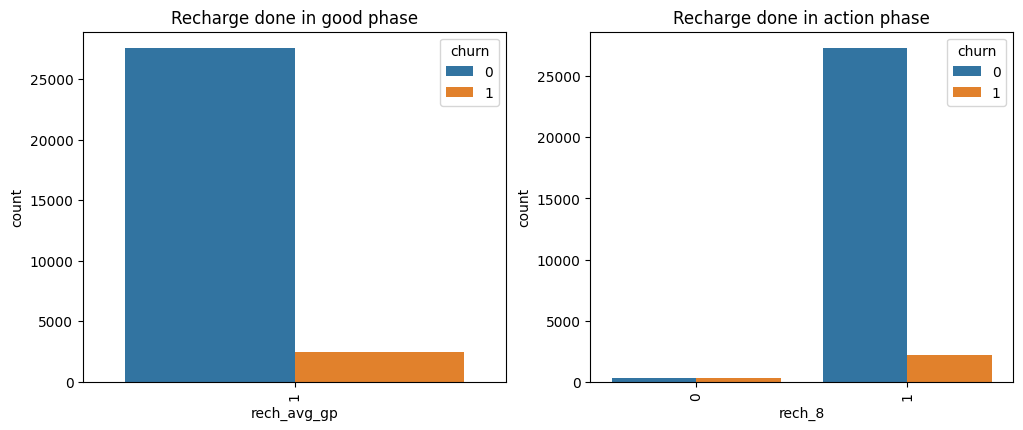

In [73]:
plt.figure(figsize = (12, 10))

plt.subplot(221)
sns.countplot(x='rech_avg_gp', hue='churn', data=data).tick_params(axis='x', rotation = 90)
plt.title('Recharge done in good phase')

plt.subplot(222)
sns.countplot(x='rech_8', hue='churn', data=data).tick_params(axis='x', rotation = 90)
plt.title('Recharge done in action phase')

plt.show()

We see that there are customers with no recharges starting from action phase month and in good phase months customers have done recharge.

Checking Correlations between Independent variables

In [74]:
data.shape

(30015, 95)

In [75]:
## Checking collinearity among the independent variables
data_corr = data.corr()
data_corr.loc[:,:] = np.tril(data_corr, k=-1)
data_corr = data_corr.stack()
data_corr[(data_corr > 0.80) | (data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8         arpu_8                     0.953617
isd_og_mou_avg_gp        isd_og_mou_8               0.949082
arpu_avg_gp              total_amt_rech_avg_gp      0.923717
total_ic_mou_8           loc_ic_mou_8               0.892257
sachet_2g_avg_gp         total_rech_data_avg_gp     0.892052
total_ic_mou_avg_gp      loc_ic_mou_avg_gp          0.891091
sachet_2g_8              total_rech_data_8          0.887638
std_og_t2t_mou_8         onnet_mou_8                0.858429
std_og_t2t_mou_avg_gp    onnet_mou_avg_gp           0.851697
loc_ic_mou_8             loc_ic_t2m_mou_8           0.850857
std_og_t2m_mou_8         offnet_mou_8               0.849970
total_og_mou_8           std_og_mou_8               0.847759
loc_ic_mou_avg_gp        loc_ic_t2m_mou_avg_gp      0.847533
std_ic_mou_8             std_ic_t2m_mou_8           0.840022
std_og_t2m_mou_avg_gp    offnet_mou_avg_gp          0.836226
av_rech_amt_data_avg_gp  max_rech_data_avg_gp       0.828714
loc_ic_mou_avg_gp       

In [76]:
drop_cols=data.columns[data.columns.str.contains('std_og_t|std_ic_t|loc_og_t|loc_ic_t')]
drop_cols

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'loc_og_t2t_mou_avg_gp', 'loc_og_t2m_mou_avg_gp',
       'loc_og_t2f_mou_avg_gp', 'loc_og_t2c_mou_avg_gp',
       'std_og_t2t_mou_avg_gp', 'std_og_t2m_mou_avg_gp',
       'std_og_t2f_mou_avg_gp', 'loc_ic_t2t_mou_avg_gp',
       'loc_ic_t2m_mou_avg_gp', 'loc_ic_t2f_mou_avg_gp',
       'std_ic_t2t_mou_avg_gp', 'std_ic_t2m_mou_avg_gp',
       'std_ic_t2f_mou_avg_gp'],
      dtype='object')

In [77]:
len(drop_cols)

26

In [78]:
#data.drop(drop_cols, axis=1, inplace=True)

In [79]:
corr_col_to_drop=['sachet_2g_avg_gp', 'sachet_2g_8', 'max_rech_data_avg_gp', 'max_rech_data_8', 
                'total_rech_data_avg_gp', 'total_rech_data_8','arpu_8', 'arpu_avg_gp']

In [80]:
#data.drop(corr_col_to_drop, axis=1, inplace=True)

In [81]:
## Dropping highly correlated independent variables having collinearity of greater than 80%  
corr_col_to_drop=['sachet_2g_avg_gp', 'sachet_2g_8', 'max_rech_data_avg_gp', 'max_rech_data_8', 'total_rech_data_avg_gp', 'total_rech_data_8',
        'arpu_8', 'arpu_avg_gp', 'total_ic_mou_avg_gp', 'total_ic_mou_8', 'total_og_mou_avg_gp', 'total_og_mou_8',
        'onnet_mou_avg_gp', 'onnet_mou_8', 'offnet_mou_avg_gp', 'offnet_mou_8']
# 'std_og_t2t_mou_avg_gp', 'std_og_t2t_mou_8', 'std_og_t2m_mou_avg_gp', 'std_og_t2m_mou_8'

data.drop(corr_col_to_drop, axis=1, inplace=True)

In [82]:
data.shape

(30015, 79)

##### Checking correlation between target variable (Churn) and all other variables

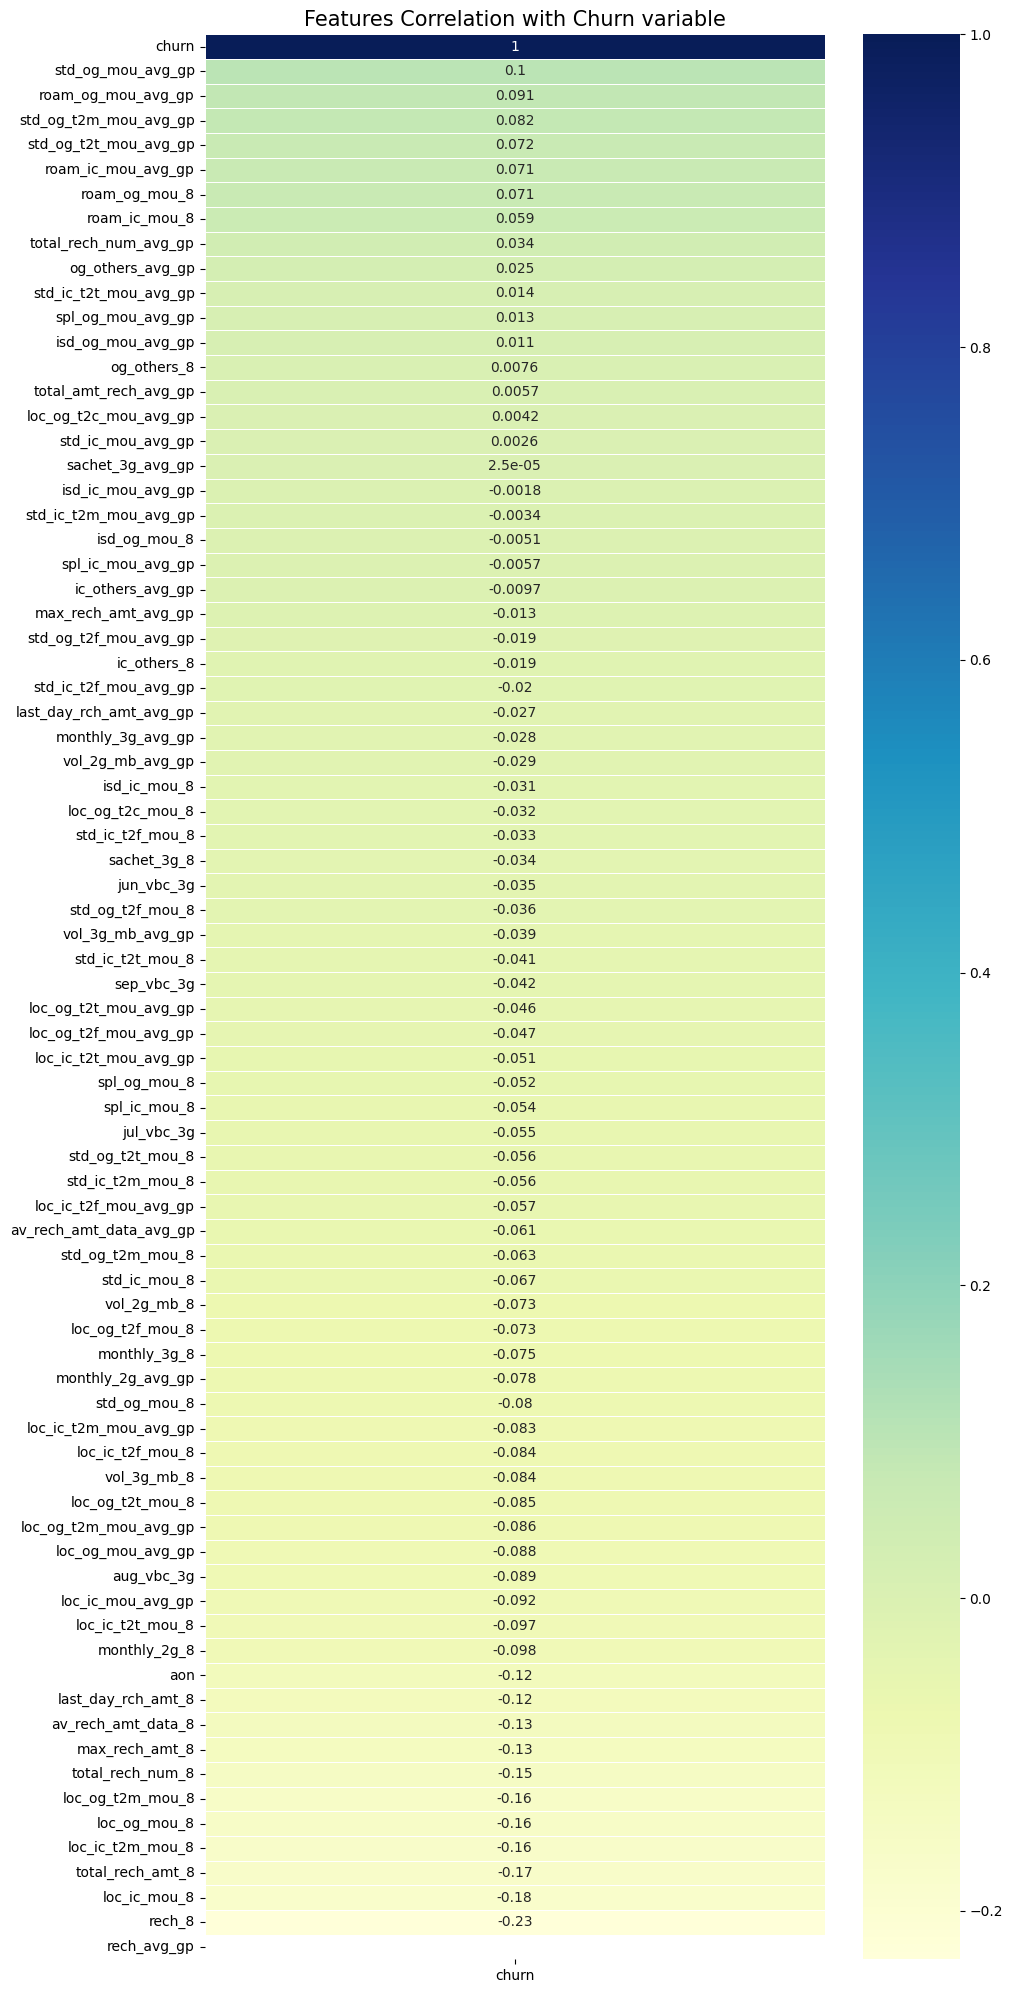

In [83]:
plt.figure(figsize=(10,25))
heatmap_churn = sns.heatmap(data.corr()[['churn']].sort_values(ascending=False, by='churn'),
                            annot=True, cmap='YlGnBu', linewidth=.5)
heatmap_churn.set_title("Features Correlation with Churn variable", fontsize=15)
plt.show()

Outgoing calls and average roaming outgoing calls having positive correlation. Recharge amount in 8th month and Local Incoming calls having negative correlation

In [84]:
# Values of rech_avg_gp is unique so we can drop this column 
data.drop(columns=['rech_avg_gp'], axis=1, inplace=True)

### 1. Model Building to Predict the Customer's Churn

#### Scaling the data

Create dummies for categorcial values

In [85]:
data.select_dtypes(include = ['category']).columns.tolist()

['age_group_on_network']

In [86]:
dummies = pd.get_dummies(data[['age_group_on_network']], drop_first=True)
# Add the results to the original dataframe
data = pd.concat([data, dummies], axis=1)
data

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,...,vol_2g_mb_avg_gp,vol_3g_mb_avg_gp,monthly_2g_avg_gp,monthly_3g_avg_gp,sachet_3g_avg_gp,age_group_on_network,age_group_on_network_6-12 months,age_group_on_network_1-2 yrs,age_group_on_network_2-5 yrs,age_group_on_network_5 yrs above
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,15.725,117.165,0.0,1.0,0.0,2-5 yrs,0,0,1,0
1,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,...,0.000,0.000,0.0,0.0,0.0,2-5 yrs,0,0,1,0
2,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,...,178.000,375.475,0.5,0.0,0.0,6-12 months,1,0,0,0
3,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,...,0.000,0.000,0.0,0.0,0.0,1-2 yrs,0,1,0,0
4,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,...,0.000,0.000,0.0,0.0,0.0,1-2 yrs,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30010,0.00,0.00,5.71,10.98,0.00,7.28,16.69,0.00,0.00,0.00,...,986.775,0.000,0.5,0.0,0.0,2-5 yrs,0,0,1,0
30011,0.00,0.00,718.56,493.48,13.01,9.15,1225.06,56.84,88.94,0.00,...,25.345,932.675,0.0,0.0,0.0,5 yrs above,0,0,0,1
30012,0.00,0.00,2.46,128.01,0.00,0.01,130.48,0.00,120.29,0.00,...,0.000,6.780,0.5,0.0,0.0,6-12 months,1,0,0,0
30013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,159.140,1417.855,0.0,1.5,0.5,1-2 yrs,0,1,0,0


Drop the categorical colums for which dummies have been created

In [87]:
data.drop('age_group_on_network', axis=1, inplace=True)

In [88]:
scaler = StandardScaler()

In [89]:
X = data.copy()

Remove the target column churn as that will not be required in PCA

In [90]:
X.drop('churn', axis=1, inplace=True)

In [91]:
num_col = X.select_dtypes(include = ['int64','float64']).columns.tolist()
print(num_col)

['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'total_amt_rech_avg_gp', 'rech_8', 'roam_ic_mou_avg_gp', 'roam_og_mou_avg_gp', 'loc_og_t2t_mou_avg_gp', 'loc_og_t2m_mou_avg_gp', 'loc_og_t2f_mou_avg_gp', 'loc_og_t2c_mou_avg_gp', 'loc_og_mou_avg_gp', 'std_og_t2t_mou_avg_gp', 'std_og_t2m_mou_avg_gp', 'std_og_t2f_mou_avg_gp', 'std_og_mou_avg_gp', 'isd_og_m

In [92]:
X[num_col] = scaler.fit_transform(X[num_col])

In [93]:
X.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,...,av_rech_amt_data_avg_gp,vol_2g_mb_avg_gp,vol_3g_mb_avg_gp,monthly_2g_avg_gp,monthly_3g_avg_gp,sachet_3g_avg_gp,age_group_on_network_6-12 months,age_group_on_network_1-2 yrs,age_group_on_network_2-5 yrs,age_group_on_network_5 yrs above
0,-0.173405,-0.195731,-0.354870,-0.678158,-0.313119,-0.234745,-0.676958,-0.393320,-0.404108,-0.150945,...,0.685989,-0.320165,-0.270143,-0.462564,1.364377,-0.205444,0,0,1,0
1,0.251523,0.166051,-0.180897,0.014418,2.361687,-0.234745,0.023229,-0.363535,-0.285009,1.343350,...,-0.678491,-0.373567,-0.409435,-0.462564,-0.390047,-0.205444,0,0,1,0
2,-0.173405,-0.195731,-0.300924,-0.462464,-0.313119,0.755054,-0.504396,-0.337321,-0.220661,-0.150945,...,-0.199299,0.230917,0.036951,0.823216,-0.390047,-0.205444,1,0,0,0
3,-0.173405,-0.195731,-0.063849,-0.130686,0.202446,-0.234745,-0.113255,-0.385310,-0.359779,-0.150945,...,-0.678491,-0.373567,-0.409435,-0.462564,-0.390047,-0.205444,0,1,0,0
4,-0.173405,-0.195731,-0.254062,-0.230851,-0.233724,-0.234745,-0.321814,-0.240078,1.721422,-0.150945,...,-0.678491,-0.373567,-0.409435,-0.462564,-0.390047,-0.205444,0,1,0,0


#### Applying PCA on the data

In [94]:
pca = PCA(random_state=42)

In [95]:
pca.fit(X)

PCA(random_state=42)

In [96]:
pca.components_

array([[ 7.90198876e-03, -4.97640316e-03,  1.19093739e-01, ...,
        -2.34391978e-02, -6.52419128e-03,  4.30525588e-02],
       [ 1.19784276e-02,  1.10264547e-02, -1.49094208e-01, ...,
         1.13671862e-02, -2.04666322e-03, -2.14269466e-02],
       [ 6.73799346e-02,  8.51754775e-02, -7.31914868e-05, ...,
         1.51143520e-02,  5.73143433e-03, -2.63611152e-02],
       ...,
       [ 9.32073916e-08,  9.91653050e-08, -1.17790178e-01, ...,
        -8.66450639e-07, -7.02150295e-07, -1.41176425e-07],
       [ 8.37356189e-08,  2.64575939e-08, -1.24767998e-02, ...,
         9.99923858e-07,  8.77934202e-07,  4.83079843e-07],
       [-4.52558977e-08, -5.65981552e-08, -3.62061370e-03, ...,
        -2.17350886e-06, -2.01220448e-06, -1.80208358e-06]])

In [97]:
pca.explained_variance_ratio_

array([9.82564619e-02, 8.11552766e-02, 6.33422591e-02, 4.78016921e-02,
       4.32203040e-02, 3.27846154e-02, 3.10046014e-02, 2.99485897e-02,
       2.95094991e-02, 2.80298227e-02, 2.60090683e-02, 2.50255573e-02,
       2.43390451e-02, 2.28944998e-02, 2.20470078e-02, 2.05858381e-02,
       1.95557588e-02, 1.80045263e-02, 1.66100585e-02, 1.59673080e-02,
       1.57881681e-02, 1.53864350e-02, 1.47153353e-02, 1.36579044e-02,
       1.31408122e-02, 1.27742966e-02, 1.16846857e-02, 1.14729298e-02,
       1.11714066e-02, 1.07953881e-02, 1.02538024e-02, 9.79019691e-03,
       9.39382483e-03, 8.93744441e-03, 8.15548732e-03, 8.04715918e-03,
       7.72009226e-03, 6.98837353e-03, 6.12199360e-03, 6.03494789e-03,
       5.67291129e-03, 4.98945276e-03, 4.84983433e-03, 4.58824620e-03,
       4.37161550e-03, 4.23438715e-03, 3.95266615e-03, 3.84007175e-03,
       3.78507401e-03, 3.66495977e-03, 3.61059120e-03, 3.53970642e-03,
       3.38598668e-03, 3.21971952e-03, 3.09095432e-03, 3.01830851e-03,
      

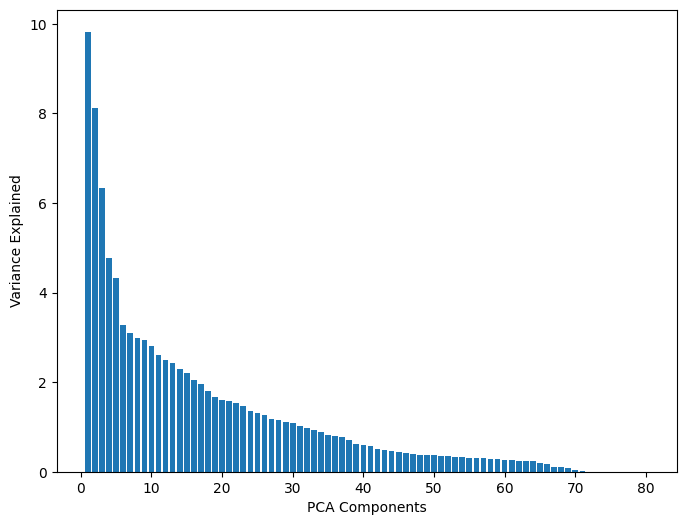

In [98]:
plt.figure(figsize=[8, 6])
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_ * 100)
plt.xlabel('PCA Components')
plt.ylabel('Variance Explained')
plt.show()

In [99]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

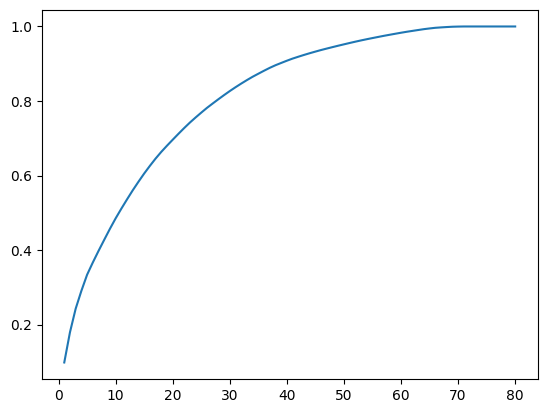

In [100]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 60 components to build a model on top this

In [101]:
pc2 = PCA(n_components=50, random_state=42)

In [102]:
data_pca = pc2.fit_transform(X)

In [103]:
data_pca.shape

(30015, 50)

Making a dataframe out of it for convenience



In [104]:
df = pd.DataFrame(data_pca)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.243502,2.476051,-1.125269,0.652739,1.681701,-0.037380,-1.024096,0.486981,-0.283779,0.406902,...,-0.103612,-0.887827,0.068716,0.878812,-0.108461,0.064823,-0.001186,-0.769204,0.042873,-0.197009
1,5.172735,-1.581989,4.115875,3.215642,6.566253,-2.659418,0.427849,-0.513797,0.891118,-0.578687,...,0.763040,-0.964720,0.645772,-5.078951,0.218936,-0.054904,0.048618,-0.484525,-0.748026,-0.204903
2,-1.519846,0.885729,-1.276337,-0.457223,-0.791815,0.454508,0.055552,0.666425,0.750797,-0.082505,...,0.222530,-0.469542,-0.246091,0.021837,0.191726,0.090067,-0.157841,0.099743,-0.314921,0.771857
3,-0.718605,-0.754098,-1.080060,1.504346,-0.029230,0.210436,-0.445503,0.484275,-0.245553,0.475230,...,-0.044305,0.256060,-0.067023,0.356097,0.069457,-0.033049,-0.428245,0.475273,-0.148590,0.129432
4,-2.817495,-0.821855,1.336329,-0.654917,-0.859981,-0.083355,-0.327090,0.399321,-0.817513,0.240559,...,0.201956,0.034325,-0.021011,0.235522,0.002532,0.003931,-0.243243,0.547791,-0.243847,0.075493


We have filtered the dataset to have only top 60 features identified after doing Principal Component Analysis (PCA) on which we will build model to predict the churn

Let's check how the target variable's distribution looks like in the original dataset

In [105]:
data.churn.value_counts(normalize=True)

0    0.918041
1    0.081959
Name: churn, dtype: float64

We see that Churn column is highly imbalance and roughly 8% of data shows churn and predicting this would require resampling of data

#### Train Test Split

In [106]:
# Create Train and Test Datasets
y = data.churn
X = data_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [107]:
X_train.shape

(21010, 50)

In [108]:
y_train.value_counts(normalize = True)

0    0.918039
1    0.081961
Name: churn, dtype: float64

In [109]:
y_test.value_counts(normalize = True)

0    0.918046
1    0.081954
Name: churn, dtype: float64

This is a case of Accuracy paradox as even if we don't build a model then also the accuracy would be really high as we have 92% of cases where churn is not identified.

Let's build LogisticRegression Model and see confusion matrix, precision and recall evaluation metrices on this dataset

In [110]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [111]:
y_pred = lreg.predict(X_test)

In [112]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9293725707940034
F1 score:  0.3977272727272727
Recall:  0.2845528455284553
Precision:  0.660377358490566

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8267
           1       0.66      0.28      0.40       738

    accuracy                           0.93      9005
   macro avg       0.80      0.64      0.68      9005
weighted avg       0.92      0.93      0.92      9005


 confussion matrix:
 [[8159  108]
 [ 528  210]]


We see that Accuracy is very high as it is Accuracy Paradox case. The F1 score, Recall value for positive churn are very low which means that model is not good enough in predictin the churn cases and it has only predicted 28% of the such cases. This is because of the class imbalance present in the dataset.

#### Handling Data Imbalance Using Sampling techniques

##### Let's use Random Under Sampling on the train dataset

In [113]:
# Random Undersampling
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3444

In [114]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 1722), (1, 1722)]


In [115]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

LogisticRegression()

In [116]:
y_pred_train_us = lreg_us.predict(X_train)

In [117]:
print ('Accuracy: ', accuracy_score(y_train, y_pred_train_us))
print ('F1 score: ', f1_score(y_train, y_pred_train_us))
print ('Recall: ', recall_score(y_train, y_pred_train_us))
print ('Precision: ', precision_score(y_train, y_pred_train_us))
print ('\n clasification report:\n', classification_report(y_train, y_pred_train_us))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_pred_train_us))

Accuracy:  0.8131841980009519
F1 score:  0.42185888937987925
Recall:  0.8315911730545877
Precision:  0.28261298598776396

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     19288
           1       0.28      0.83      0.42      1722

    accuracy                           0.81     21010
   macro avg       0.63      0.82      0.66     21010
weighted avg       0.92      0.81      0.85     21010


 confussion matrix:
 [[15653  3635]
 [  290  1432]]


This time we see that Recall value is good enough to consider this as an predictive model as it has correctly identifed the 83% of the positive churned cases on the train dataset.

Let's plot the AUC ROC curve on the training dataset first

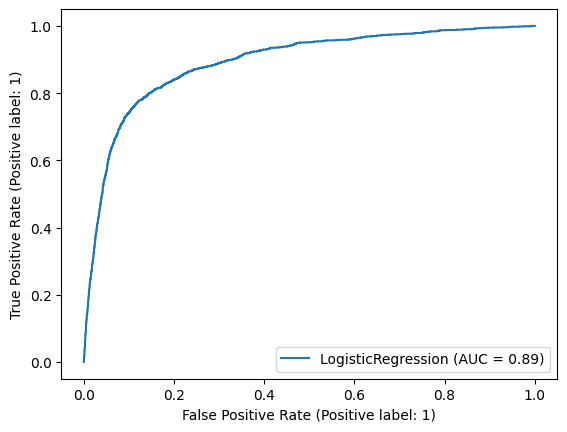

In [118]:
RocCurveDisplay.from_estimator(lreg_us, X_train, y_train)
plt.show()

An AUC ROC value of 0.89 suggests that model is performing well in distinguishing between positive and negative cases and 89% of the variations are explained by this model

##### SMOTE Synthetic Minority Oversampling Technique

In [119]:
# SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38576

In [120]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 19288), (1, 19288)]


In [121]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [122]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8272071071626874
F1 score:  0.4398848092152628
Recall:  0.8279132791327913
Precision:  0.2995098039215686

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8267
           1       0.30      0.83      0.44       738

    accuracy                           0.83      9005
   macro avg       0.64      0.83      0.67      9005
weighted avg       0.93      0.83      0.86      9005


 confussion matrix:
 [[6838 1429]
 [ 127  611]]


##### Combining Oversampling and Undersampling

1. Tomek links can be used as an under-sampling method or as a data cleaning method.
2. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that from Tomek links, examples from both classes are removed.

In [123]:
# SMOTE + TOMEK
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

38560

In [124]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 19280), (1, 19280)]


In [125]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [126]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.8269850083287063
F1 score:  0.439568345323741
Recall:  0.8279132791327913
Precision:  0.29921645445641526

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8267
           1       0.30      0.83      0.44       738

    accuracy                           0.83      9005
   macro avg       0.64      0.83      0.67      9005
weighted avg       0.93      0.83      0.86      9005


 confussion matrix:
 [[6836 1431]
 [ 127  611]]


We see that the best Recall value and Accuracy is from Random Under sampling (Random US) so will go ahead this resampling technique

#### Making Predictions on Test Dataset

In [127]:
y_pred_us = lreg_us.predict(X_test)

In [128]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.8143253747917824
F1 score:  0.4230503795721186
Recall:  0.8306233062330624
Precision:  0.28379629629629627

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8267
           1       0.28      0.83      0.42       738

    accuracy                           0.81      9005
   macro avg       0.63      0.82      0.66      9005
weighted avg       0.92      0.81      0.85      9005


 confussion matrix:
 [[6720 1547]
 [ 125  613]]


A good improvement in the Recall evaluation metric value can be seen i.e. 83 % for the churned cases and this is important as it's is minority class problem and identifying positive cases are more important rather than non-positive cases

#### Model Evaluation

In [129]:
print ('Recall Value ', recall_score(y_test, y_pred_us).round(2))

Recall Value  0.83


Ploting the ROC curve

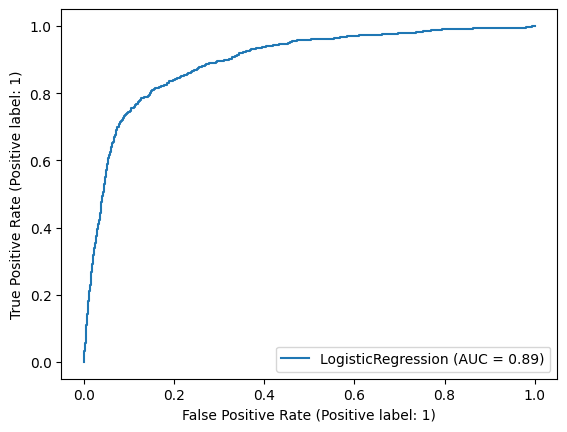

In [130]:
RocCurveDisplay.from_estimator(lreg_us, X_test, y_test)
plt.show()

An AUC ROC value of 0.89 suggests that the model is performing well in distinguishing between positive and negative cases, and it has a good level of discriminatory power. The sensitivity and specificity metrices are good for this model.

### 2. Model Building for identifying important predictor attributes which help the business understand indicators of churn

#### Using Random Forest

Let's create Random forest model on the original data to identify the important attributes which will help business make decisions on to reduce the churn. We will use feature importance value of the various attributes for this

In [131]:
#Selecting features to scale
scale_features=data.columns[data.columns.str.contains('amt|rech|max|vol|ic|og')]

In [132]:
#Feature scaling for the numeric varibles
scaler = StandardScaler()
data[scale_features] = scaler.fit_transform(data[scale_features])
data.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,...,av_rech_amt_data_avg_gp,vol_2g_mb_avg_gp,vol_3g_mb_avg_gp,monthly_2g_avg_gp,monthly_3g_avg_gp,sachet_3g_avg_gp,age_group_on_network_6-12 months,age_group_on_network_1-2 yrs,age_group_on_network_2-5 yrs,age_group_on_network_5 yrs above
0,-0.173405,-0.195731,-0.354870,-0.678158,-0.313119,-0.234745,-0.676958,-0.393320,-0.404108,-0.150945,...,0.685989,-0.320165,-0.270143,0.0,1.0,0.0,0,0,1,0
1,0.251523,0.166051,-0.180897,0.014418,2.361687,-0.234745,0.023229,-0.363535,-0.285009,1.343350,...,-0.678491,-0.373567,-0.409435,0.0,0.0,0.0,0,0,1,0
2,-0.173405,-0.195731,-0.300924,-0.462464,-0.313119,0.755054,-0.504396,-0.337321,-0.220661,-0.150945,...,-0.199299,0.230917,0.036951,0.5,0.0,0.0,1,0,0,0
3,-0.173405,-0.195731,-0.063849,-0.130686,0.202446,-0.234745,-0.113255,-0.385310,-0.359779,-0.150945,...,-0.678491,-0.373567,-0.409435,0.0,0.0,0.0,0,1,0,0
4,-0.173405,-0.195731,-0.254062,-0.230851,-0.233724,-0.234745,-0.321814,-0.240078,1.721422,-0.150945,...,-0.678491,-0.373567,-0.409435,0.0,0.0,0.0,0,1,0,0


Train and Test dataset split

In [133]:
y = data.churn
X = data.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)
X_train.shape

(21010, 80)

In [134]:
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)

In [135]:
# Initializing the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [136]:
X_resampled_us.shape

(3444, 80)

In [137]:
%%time
rf.fit(X_resampled_us, y_resampled_us)

CPU times: total: 62.5 ms
Wall time: 113 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [138]:
rf.oob_score_

0.8095238095238095

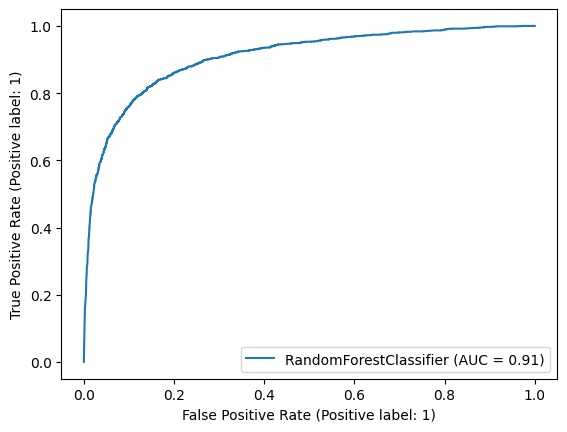

In [139]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [140]:
rf = RandomForestClassifier(random_state=42, n_jobs=12)

In [141]:
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [20, 50, 100],
    'n_estimators': [10, 25, 50]
    
}

In [142]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=12, verbose=1, scoring="accuracy")

In [143]:
%%time
grid_search.fit(X_resampled_us, y_resampled_us)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
CPU times: total: 1.44 s
Wall time: 24.5 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=12, random_state=42),
             n_jobs=12,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [144]:
grid_search.best_score_

0.8461091753774681

In [145]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=20, n_estimators=25,
                       n_jobs=12, random_state=42)

Making prediction with the best Random Forest estimator

In [146]:
y_pred_rf=rf_best.predict(X_test)

Checking the metices after the predictions on the model

In [147]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test, y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.8873958911715714
F1 score:  0.5432432432432432
Recall:  0.8170731707317073
Precision:  0.4068825910931174

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.94      8267
           1       0.41      0.82      0.54       738

    accuracy                           0.89      9005
   macro avg       0.69      0.86      0.74      9005
weighted avg       0.93      0.89      0.90      9005


 confussion matrix:
 [[7388  879]
 [ 135  603]]


Plot AUC RUC Curve to see the Area under curve which will explain how the bias and variance trade off looks like

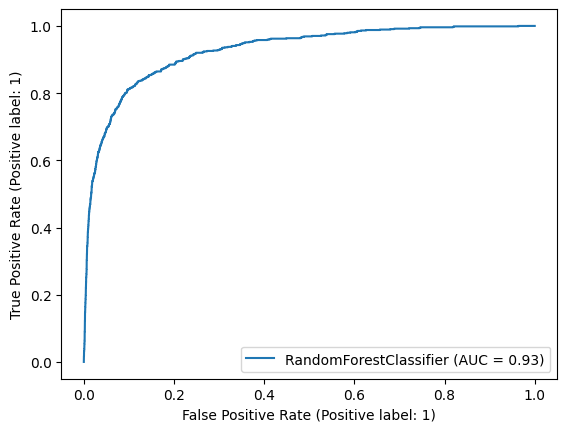

In [148]:
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
plt.show()

In [149]:
rf_best.feature_importances_

array([4.75704989e-02, 3.34059152e-02, 5.17363964e-02, 1.16536492e-01,
       2.86228058e-02, 3.01703638e-04, 6.16346930e-02, 3.79155132e-03,
       2.55703794e-03, 0.00000000e+00, 1.91668995e-02, 1.90418031e-04,
       3.57373398e-04, 0.00000000e+00, 4.88797652e-02, 1.03024647e-01,
       3.18816825e-02, 5.57381987e-02, 1.94321044e-03, 2.22832947e-02,
       1.24812617e-03, 1.26605216e-02, 1.64380287e-03, 9.26355833e-04,
       2.09146156e-03, 1.05170970e-02, 8.30562531e-02, 1.84158672e-02,
       5.07258019e-02, 3.09526230e-02, 1.03560631e-02, 1.69771889e-02,
       6.91197292e-04, 1.11797588e-03, 0.00000000e+00, 1.03763223e-02,
       4.11264935e-03, 7.45806948e-04, 1.96404267e-03, 1.64304714e-03,
       9.12769930e-03, 4.90071581e-05, 2.53014269e-03, 2.02080577e-03,
       3.32883184e-03, 4.44625356e-03, 1.32370749e-03, 2.57685390e-04,
       3.98801288e-03, 7.21498681e-03, 7.47708512e-03, 4.85297354e-04,
       9.86900949e-03, 2.32439500e-03, 1.81048153e-03, 1.92503133e-04,
      

Let's map the feature importances to the features so that we can see whic features have the high importance values

In [150]:
imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importance": rf_best.feature_importances_
})

In [151]:
# Sort the importnat features in high to low feature_importances_ value
imp_df.sort_values(by="Importance", ascending=False)

,Features,Importance
3,loc_og_t2m_mou_8,0.116536
15,loc_ic_t2m_mou_8,0.103025
26,total_rech_amt_8,0.083056
6,loc_og_mou_8,0.061635
17,loc_ic_mou_8,0.055738
...,...,...
41,rech_8,0.000049
78,age_group_on_network_2-5 yrs,0.000033
34,sachet_3g_8,0.000000
9,std_og_t2f_mou_8,0.000000


Filtering top important features which explains more variance in the model

In [152]:
imp_features=imp_df[imp_df.Importance >= 0.01].sort_values(by="Importance", ascending=False)
imp_features

,Features,Importance
3,loc_og_t2m_mou_8,0.116536
15,loc_ic_t2m_mou_8,0.103025
26,total_rech_amt_8,0.083056
6,loc_og_mou_8,0.061635
17,loc_ic_mou_8,0.055738
2,loc_og_t2t_mou_8,0.051736
28,last_day_rch_amt_8,0.050726
14,loc_ic_t2t_mou_8,0.048880
0,roam_ic_mou_8,0.047570
1,roam_og_mou_8,0.033406


In [153]:
len(imp_features)

21

#### Let's filter only the important features and build a model to see how good does it explain the prediction of Churn

In [154]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
X_train_sm=X_train[imp_features.Features]

In [156]:
X_train_sm

,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,total_rech_amt_8,loc_og_mou_8,loc_ic_mou_8,loc_og_t2t_mou_8,last_day_rch_amt_8,loc_ic_t2t_mou_8,roam_ic_mou_8,roam_og_mou_8,...,av_rech_amt_data_8,loc_og_t2f_mou_8,std_ic_t2m_mou_8,std_og_mou_8,max_rech_amt_8,vol_3g_mb_8,std_ic_mou_8,total_rech_num_8,aon,vol_2g_mb_8
30000,-0.474414,-0.140188,-0.677798,-0.501959,-0.286877,-0.297728,-0.489652,-0.286391,-0.173405,-0.195731,...,-0.328447,-0.164882,-0.216913,-0.484324,-0.573387,-0.066498,-0.257424,-0.098698,40.466667,-0.303645
6748,-0.529041,-0.575241,0.227113,-0.544662,-0.649452,-0.297080,0.230720,-0.384484,-0.173405,-0.195731,...,-0.583655,-0.313119,-0.172600,1.754844,-0.091982,-0.370171,-0.248563,-0.312289,7.200000,-0.307063
7280,1.033394,0.810044,0.999921,0.975198,0.740745,0.511152,0.230720,0.373032,-0.173405,-0.195731,...,1.692802,-0.212619,0.072945,-0.485336,0.499624,1.056429,-0.050091,0.221690,79.600000,-0.015031
16650,1.118750,-0.374444,0.156107,0.756757,-0.458962,0.088744,0.367934,-0.306557,-0.173405,-0.195731,...,-0.496884,-0.313119,-0.273408,-0.485107,-0.091982,-0.336774,-0.325896,-0.312289,120.433333,-0.304918
3989,-0.676835,-0.647129,-0.945309,-0.673838,-0.669315,-0.351285,-0.661169,-0.324178,-0.173405,-0.195731,...,-0.583655,-0.313119,-0.277724,-0.478173,-0.787989,-0.370171,-0.259621,-0.739473,22.466667,-0.307063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,0.393653,0.464229,0.975151,0.223521,0.474046,-0.024761,-0.455348,0.373478,-0.173405,-0.195731,...,-0.160009,-0.243774,-0.148429,-0.197227,-0.207983,0.288028,-0.227794,1.716832,59.733333,-0.301935
23586,-0.672567,-0.452314,-0.515971,-0.671265,-0.425427,-0.351587,-0.489652,-0.372843,-0.173405,-0.195731,...,0.682178,-0.313119,-0.207226,-0.531197,0.186421,-0.208519,-0.276987,-0.312289,28.400000,2.743986
10615,0.598891,0.286213,0.040516,0.153664,0.038113,-0.336687,0.539451,-0.314954,-0.173405,-0.195731,...,1.595823,-0.313119,-0.279162,-0.533530,0.499624,0.875080,-0.328732,-0.739473,77.233333,-0.292150
20142,-0.310318,-0.476522,0.078496,-0.413817,-0.578590,-0.311981,0.230720,-0.381812,-0.173405,-0.195731,...,-0.583655,-0.313119,1.967957,1.089236,-0.207983,-0.370171,4.796030,-0.312289,94.466667,-0.307063


In [157]:
X_train_sm = sm.add_constant(X_train_sm)
lr1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lr1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4059.7
Date:                Tue, 12 Sep 2023   Deviance:                       8119.3
Time:                        21:08:51   Pearson chi2:                 3.55e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1652
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7550      0

In [158]:
#roam_ic_mou_8 high p-value
X_train_sm.drop('roam_ic_mou_8', axis=1, inplace=True)

In [159]:
X_train_sm = sm.add_constant(X_train_sm)
lr2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lr2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4059.7
Date:                Tue, 12 Sep 2023   Deviance:                       8119.4
Time:                        21:08:51   Pearson chi2:                 3.54e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1652
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7562      0

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_og_mou_8,3.767505e+09
5,loc_ic_mou_8,2.699356e+09
1,loc_og_t2m_mou_8,1.531957e+09
6,loc_og_t2t_mou_8,1.519572e+09
2,loc_ic_t2m_mou_8,1.354247e+09
8,loc_ic_t2t_mou_8,7.029227e+08
10,loc_ic_t2f_mou_8,5.349291e+07
12,loc_og_t2f_mou_8,1.143711e+07
11,av_rech_amt_data_8,3.210000e+00
17,std_ic_mou_8,2.990000e+00


In [161]:
X_train_sm.drop('loc_og_mou_8', axis=1, inplace=True)

In [162]:
X_train_sm = sm.add_constant(X_train_sm)
lr3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lr3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4095.0
Date:                Tue, 12 Sep 2023   Deviance:                       8189.9
Time:                        21:08:52   Pearson chi2:                 5.50e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1624
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7964      0

In [163]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,2.552849e+09
2,loc_ic_t2m_mou_8,1.280747e+09
7,loc_ic_t2t_mou_8,6.647721e+08
9,loc_ic_t2f_mou_8,5.058976e+07
10,av_rech_amt_data_8,3.210000e+00
16,std_ic_mou_8,2.990000e+00
12,std_ic_t2m_mou_8,2.960000e+00
15,vol_3g_mb_8,2.910000e+00
0,const,2.860000e+00
14,max_rech_amt_8,2.650000e+00


In [164]:
X_train_sm.drop('loc_ic_mou_8', axis=1, inplace=True)

In [165]:
X_train_sm = sm.add_constant(X_train_sm)
lr4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lr4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4200.5
Date:                Tue, 12 Sep 2023   Deviance:                       8400.9
Time:                        21:08:53   Pearson chi2:                 3.74e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1540
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9288      0

In [166]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,av_rech_amt_data_8,3.21
15,std_ic_mou_8,2.99
11,std_ic_t2m_mou_8,2.96
14,vol_3g_mb_8,2.91
0,const,2.82
13,max_rech_amt_8,2.65
3,total_rech_amt_8,2.17
5,last_day_rch_amt_8,2.05
1,loc_og_t2m_mou_8,1.53
16,total_rech_num_8,1.51


total_rech_amt_8 p-value is high as 0.415 so drop

In [167]:
X_train_sm.drop('total_rech_amt_8', axis=1, inplace=True)

In [168]:
X_train_sm = sm.add_constant(X_train_sm)
lr5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lr5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4200.9
Date:                Tue, 12 Sep 2023   Deviance:                       8401.7
Time:                        21:08:54   Pearson chi2:                 3.61e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1539
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9251      0

In [169]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,av_rech_amt_data_8,3.18
14,std_ic_mou_8,2.99
10,std_ic_t2m_mou_8,2.96
13,vol_3g_mb_8,2.91
0,const,2.82
12,max_rech_amt_8,2.26
4,last_day_rch_amt_8,2.04
1,loc_og_t2m_mou_8,1.47
2,loc_ic_t2m_mou_8,1.42
15,total_rech_num_8,1.35


In [170]:
X_train_sm.drop('loc_og_t2f_mou_8', axis=1, inplace=True)

In [171]:
X_train_sm = sm.add_constant(X_train_sm)
lr6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lr6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4202.6
Date:                Tue, 12 Sep 2023   Deviance:                       8405.3
Time:                        21:08:55   Pearson chi2:                 3.29e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1538
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9222      0

In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,av_rech_amt_data_8,3.18
13,std_ic_mou_8,2.99
9,std_ic_t2m_mou_8,2.96
12,vol_3g_mb_8,2.91
0,const,2.81
11,max_rech_amt_8,2.24
4,last_day_rch_amt_8,2.04
1,loc_og_t2m_mou_8,1.45
2,loc_ic_t2m_mou_8,1.42
14,total_rech_num_8,1.34


In [173]:
X_train_sm.drop('std_ic_t2m_mou_8', axis=1, inplace=True)

In [174]:
X_train_sm = sm.add_constant(X_train_sm)
lr7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lr7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21010
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4204.4
Date:                Tue, 12 Sep 2023   Deviance:                       8408.8
Time:                        21:08:56   Pearson chi2:                 3.16e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1537
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9154      0

In [175]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,av_rech_amt_data_8,3.18
11,vol_3g_mb_8,2.91
0,const,2.81
10,max_rech_amt_8,2.24
4,last_day_rch_amt_8,2.04
1,loc_og_t2m_mou_8,1.45
2,loc_ic_t2m_mou_8,1.42
13,total_rech_num_8,1.34
9,std_og_mou_8,1.32
15,vol_2g_mb_8,1.18


In [176]:
X_train_sm.shape

(21010, 16)

In [177]:
X_train_sm.head()

,const,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,loc_og_t2t_mou_8,last_day_rch_amt_8,loc_ic_t2t_mou_8,roam_og_mou_8,loc_ic_t2f_mou_8,av_rech_amt_data_8,std_og_mou_8,max_rech_amt_8,vol_3g_mb_8,std_ic_mou_8,total_rech_num_8,aon,vol_2g_mb_8
30000,1.0,-0.474414,-0.140188,-0.297728,-0.489652,-0.286391,-0.195731,-0.292612,-0.328447,-0.484324,-0.573387,-0.066498,-0.257424,-0.098698,40.466667,-0.303645
6748,1.0,-0.529041,-0.575241,-0.297080,0.230720,-0.384484,-0.195731,-0.336087,-0.583655,1.754844,-0.091982,-0.370171,-0.248563,-0.312289,7.200000,-0.307063
7280,1.0,1.033394,0.810044,0.511152,0.230720,0.373032,-0.195731,-0.135294,1.692802,-0.485336,0.499624,1.056429,-0.050091,0.221690,79.600000,-0.015031
16650,1.0,1.118750,-0.374444,0.088744,0.367934,-0.306557,-0.195731,-0.271323,-0.496884,-0.485107,-0.091982,-0.336774,-0.325896,-0.312289,120.433333,-0.304918
3989,1.0,-0.676835,-0.647129,-0.351285,-0.661169,-0.324178,-0.195731,-0.336087,-0.583655,-0.478173,-0.787989,-0.370171,-0.259621,-0.739473,22.466667,-0.307063


Let's make the prediction on the train dataset

In [178]:
y_train_pred_prob=res.predict(X_train_sm)
y_train_pred_prob[:10]

30000    1.011808e-01
6748     9.967752e-02
7280     1.894622e-04
16650    1.876706e-02
3989     3.911027e-01
8629     2.498395e-08
13937    4.719783e-01
22298    7.207326e-04
1900     8.867591e-03
4494     7.950277e-04
dtype: float64

Reshapping the Pred probabilities to an array

In [179]:
y_train_pred_prob = y_train_pred_prob.values.reshape(-1)
y_train_pred_prob[:10]

array([1.01180850e-01, 9.96775203e-02, 1.89462166e-04, 1.87670634e-02,
       3.91102707e-01, 2.49839467e-08, 4.71978305e-01, 7.20732605e-04,
       8.86759130e-03, 7.95027727e-04])

Data frame with given Churn ratio and probablity of predicted ones

In [180]:
y_train_pred = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_prob})
y_train_pred.head()

,churn,churn_prob
0,0,0.101181
1,0,0.099678
2,0,0.000189
3,0,0.018767
4,0,0.391103


Substituting 0 or 1 with the random cut off as 0.5

In [181]:
y_train_pred['churn_pred'] = y_train_pred.churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred.head()

,churn,churn_prob,churn_pred
0,0,0.101181,0
1,0,0.099678,0
2,0,0.000189,0
3,0,0.018767,0
4,0,0.391103,0


In [182]:
print ('Accuracy: ', accuracy_score(y_train_pred.churn, y_train_pred.churn_pred))
print ('F1 score: ', f1_score(y_train_pred.churn, y_train_pred.churn_pred))
print ('Recall: ', recall_score(y_train_pred.churn, y_train_pred.churn_pred))
print ('Precision: ', precision_score(y_train_pred.churn, y_train_pred.churn_pred))
print ('\n clasification report:\n', classification_report(y_train_pred.churn, y_train_pred.churn_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred.churn, y_train_pred.churn_pred))

Accuracy:  0.9209424083769634
F1 score:  0.11223944414751469
Recall:  0.06097560975609756
Precision:  0.7046979865771812

 clasification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     19288
           1       0.70      0.06      0.11      1722

    accuracy                           0.92     21010
   macro avg       0.81      0.53      0.54     21010
weighted avg       0.90      0.92      0.89     21010


 confussion matrix:
 [[19244    44]
 [ 1617   105]]


We see that with threshold of 0.5 the Recall metric is very less hence this is not an acceptable model and let's find out what is the optimal threshold

ROC Function

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score

In [184]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

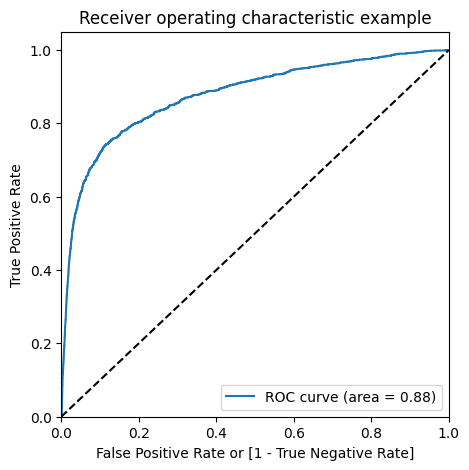

In [185]:
draw_roc(y_train_pred.churn, y_train_pred.churn_prob)

Creating columns with different probability cutoffs 

In [186]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,churn,churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.101181,0,1,1,0,0,0,0,0,0,0,0
1,0,0.099678,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000189,0,1,0,0,0,0,0,0,0,0,0
3,0,0.018767,0,1,0,0,0,0,0,0,0,0,0
4,0,0.391103,0,1,1,1,1,0,0,0,0,0,0


In [187]:
cutoff_df = pd.DataFrame( columns = ['Probability', 'Accuracy', 'Sensitivity/Recall', 'Specificity'])
# Making confusing matrix to find values of sensitivity, accuracy and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for n in num:
    conf_matrix = confusion_matrix(y_train_pred.churn, y_train_pred[n] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / total    
    specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
    sensitivity = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])
    cutoff_df.loc[n] =[n, accuracy, sensitivity, specificity]

cutoff_df

,Probability,Accuracy,Sensitivity/Recall,Specificity
0.0,0.0,0.081961,1.000000,0.000000
0.1,0.1,0.809424,0.799071,0.810348
0.2,0.2,0.894574,0.696283,0.912277
0.3,0.3,0.923132,0.605110,0.951524
0.4,0.4,0.933746,0.457027,0.976307
0.5,0.5,0.920942,0.060976,0.997719
0.6,0.6,0.917658,0.003484,0.999274
0.7,0.7,0.917944,0.000581,0.999844
0.8,0.8,0.918039,0.000581,0.999948
0.9,0.9,0.918039,0.000000,1.000000


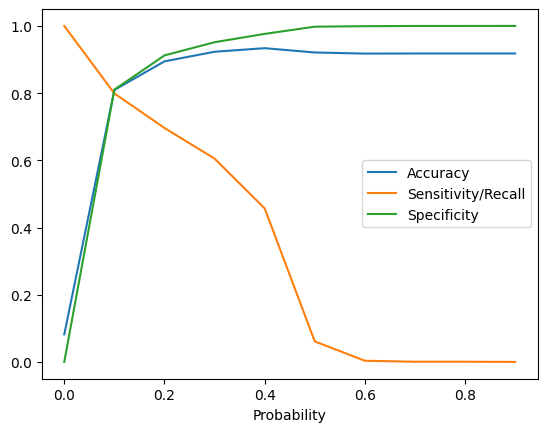

In [188]:
cutoff_df.plot.line(x='Probability', y=['Accuracy', 'Sensitivity/Recall', 'Specificity'])
plt.show()

___The graph shows that the optimal cut off is at close to 0.1___

In [189]:
y_train_pred['churn_pred_final'] = y_train_pred.churn_prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred.head()

,churn,churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,churn_pred_final
0,0,0.101181,0,1,1,0,0,0,0,0,0,0,0,1
1,0,0.099678,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000189,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.018767,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.391103,0,1,1,1,1,0,0,0,0,0,0,1


In [190]:
print ('Accuracy: ', accuracy_score(y_train_pred.churn, y_train_pred.churn_pred_final))
print ('F1 score: ', f1_score(y_train_pred.churn, y_train_pred.churn_pred_final))
print ('Recall: ', recall_score(y_train_pred.churn, y_train_pred.churn_pred_final))
print ('Precision: ', precision_score(y_train_pred.churn, y_train_pred.churn_pred_final))
print ('\n clasification report:\n', classification_report(y_train_pred.churn, y_train_pred.churn_pred_final))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred.churn, y_train_pred.churn_pred_final))

Accuracy:  0.8094240837696335
F1 score:  0.4073416222616933
Recall:  0.7990708478513356
Precision:  0.27334127930075486

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     19288
           1       0.27      0.80      0.41      1722

    accuracy                           0.81     21010
   macro avg       0.63      0.80      0.65     21010
weighted avg       0.92      0.81      0.85     21010


 confussion matrix:
 [[15630  3658]
 [  346  1376]]


___With a cutoff of 0.1, the model is achieving an overall accuracy of around 81%. This means that 81% of the predictions made by the model are correct.The sensitivity of around 80% indicates that the model correctly identifies around 80% of the positive cases (true positives) out of all the actual positive cases. It is also known as the true positive rate or Recall.The specificity at around 81% indicates that the model correctly identifies around 81% of the negative cases (true negatives) out of all the actual negative cases. It is also known as the true negative rate.___

##### Making Predictions on the Test Dataset

In [191]:
X_train_sm.drop('const', axis=1, inplace=True)

In [192]:
X_test_sm = X_test[X_train_sm.columns]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm

,const,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,loc_og_t2t_mou_8,last_day_rch_amt_8,loc_ic_t2t_mou_8,roam_og_mou_8,loc_ic_t2f_mou_8,av_rech_amt_data_8,std_og_mou_8,max_rech_amt_8,vol_3g_mb_8,std_ic_mou_8,total_rech_num_8,aon,vol_2g_mb_8
27638,1.0,-0.599460,-0.587529,-0.311506,6.871860,-0.354776,-0.195731,-0.336087,-0.583655,-0.523040,5.406474,-0.370171,-0.320935,-0.632677,36.133333,-0.307063
4307,1.0,-0.147544,-0.406982,-0.301054,-0.455348,-0.223541,0.320992,-0.336087,-0.496884,0.026225,-0.207983,-0.370171,-0.073270,0.328486,16.733333,-0.307063
11416,1.0,-0.544875,-0.125231,-0.340574,-0.455348,-0.170232,-0.195731,-0.336087,-0.583655,0.093476,-0.207983,-0.370171,0.285681,0.648873,20.300000,-0.307063
1040,1.0,-0.671841,-0.683395,-0.353229,0.230720,-0.373543,-0.195731,-0.336087,-0.583655,1.441952,-0.207983,-0.370171,2.374316,-0.419085,20.300000,-0.307063
16287,1.0,-0.403697,-0.480664,-0.191435,-0.489652,-0.199367,-0.195731,-0.307403,-0.073239,-0.533074,-0.671988,-0.190117,-0.330149,0.114894,31.966667,-0.307063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27019,1.0,0.153334,-0.398146,-0.198260,0.710968,-0.055281,0.381352,-0.336087,0.457595,-0.244737,0.198021,0.274774,-0.150745,0.008098,101.466667,0.294762
391,1.0,-0.331699,-0.503998,-0.179558,-0.661169,-0.331048,-0.112463,0.013060,-0.583655,-0.371342,-0.207983,-0.370171,-0.167615,-0.632677,114.766667,-0.307063
12985,1.0,-0.678158,-0.686708,-0.354870,0.539451,-0.384930,-0.195731,-0.336087,2.882072,-0.443732,0.499624,3.488855,-0.134300,-0.205493,38.100000,-0.269394
13266,1.0,-0.506422,-0.566037,-0.206034,-0.661169,-0.247396,-0.195731,-0.336087,0.003324,0.228728,-0.787989,-0.370171,-0.020178,1.823627,33.100000,-0.307063


In [193]:
y_test_pred_prob = res.predict(X_test_sm)
y_test_pred_prob[:10]

27638    0.007885
4307     0.103607
11416    0.067260
1040     0.057322
16287    0.104485
24275    0.098640
24160    0.004325
7224     0.000255
1328     0.015387
8736     0.005198
dtype: float64

Reshapping the predicted probabilities to an array

In [194]:
y_test_pred_prob = y_test_pred_prob.values.reshape(-1)
y_test_pred_prob[:10]

array([0.00788521, 0.10360664, 0.06726017, 0.05732184, 0.10448488,
       0.09863963, 0.00432496, 0.0002546 , 0.01538682, 0.00519804])

Data frame with given Test Churn ratio and Test probablity of predicted values

In [195]:
y_test_pred = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred_prob})
y_test_pred.head()

,churn,churn_prob
0,0,0.007885
1,1,0.103607
2,1,0.067260
3,0,0.057322
4,0,0.104485


In [196]:
y_test_pred['churn_pred'] = y_test_pred.churn_prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred.head()

,churn,churn_prob,churn_pred
0,0,0.007885,0
1,1,0.103607,1
2,1,0.067260,0
3,0,0.057322,0
4,0,0.104485,1


In [197]:
print ('Accuracy: ', accuracy_score(y_test_pred.churn, y_test_pred.churn_pred))
print ('F1 score: ', f1_score(y_test_pred.churn, y_test_pred.churn_pred))
print ('Recall: ', recall_score(y_test_pred.churn, y_test_pred.churn_pred))
print ('Precision: ', precision_score(y_test_pred.churn, y_test_pred.churn_pred))
print ('\n clasification report:\n', classification_report(y_test_pred.churn, y_test_pred.churn_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test_pred.churn, y_test_pred.churn_pred))

Accuracy:  0.8098833981121599
F1 score:  0.4088397790055249
Recall:  0.8021680216802168
Precision:  0.2743280815569972

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8267
           1       0.27      0.80      0.41       738

    accuracy                           0.81      9005
   macro avg       0.63      0.81      0.65      9005
weighted avg       0.92      0.81      0.85      9005


 confussion matrix:
 [[6701 1566]
 [ 146  592]]


We can see the Accuracy of 81%, Recall or Sensitivity of 80% is given by the model which is good enough so will consider this model

Finally let's see what all the important features used in the model

In [198]:
X_test_sm.drop('const', axis=1, inplace=True)

In [199]:
important_features=X_test_sm.columns
important_features

Index(['loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2t_mou_8',
       'last_day_rch_amt_8', 'loc_ic_t2t_mou_8', 'roam_og_mou_8',
       'loc_ic_t2f_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8',
       'max_rech_amt_8', 'vol_3g_mb_8', 'std_ic_mou_8', 'total_rech_num_8',
       'aon', 'vol_2g_mb_8'],
      dtype='object')

### Conclusion

In [200]:
important_features

Index(['loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2t_mou_8',
       'last_day_rch_amt_8', 'loc_ic_t2t_mou_8', 'roam_og_mou_8',
       'loc_ic_t2f_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8',
       'max_rech_amt_8', 'vol_3g_mb_8', 'std_ic_mou_8', 'total_rech_num_8',
       'aon', 'vol_2g_mb_8'],
      dtype='object')

Let's filter only these features from the imp_features dataframe which has feature importance created earlier

In [201]:
imp_features.apply(lambda x: x[imp_features['Features'].isin(important_features)])

,Features,Importance
3,loc_og_t2m_mou_8,0.116536
15,loc_ic_t2m_mou_8,0.103025
2,loc_og_t2t_mou_8,0.051736
28,last_day_rch_amt_8,0.050726
14,loc_ic_t2t_mou_8,0.048880
1,roam_og_mou_8,0.033406
16,loc_ic_t2f_mou_8,0.031882
29,av_rech_amt_data_8,0.030953
10,std_og_mou_8,0.019167
27,max_rech_amt_8,0.018416


As we have identified important predictors, we see that most of the features are related to incoming/outgoing voice calls minutes of usage and data usage in action phase.

Below are the important predictors which will help the business understand indicators of customer's churn in the order of high to low importance.

- Local Outgoing to other Telecom operator Mobile Minutes of Usage in action phase month
- Local Incoming of other Telecom operator Mobile Minutes of usage in action phase month
- Local Outgoing within same Telecom operator Minutes of usage in action phase month
- Last Day Recharge Amount in action phase month
- Local Incoming within same Telecom operator Minutes of usage in action phase month
- Roaming Outgoing Minutes of usage in action phase month
- Local Incoming to fixed lines within same Telecom operator Minutes of usage in action phase month
- Average Recharge data amount in action phase month
- STD Outgoing Minutes of usage in action phase month
- Maximun Amount Recharge in action phase month
- Volume 3g data usage in action phase month
- STD Incoming Minutes of usage in action phase month
- Total Recharge Numbers in action phase month
- Age of Customer on Network in decreasing churn ratio (0-6 months, 6-12 months, 1-2 yrs, 2-5 yrs, 5 yrs and above)
- Volume 2g data usage in action phase month